# Лабораторная работа №1: Метод золотого сечения и метод равномерного поиска

## Исследуемая функция:
$$f(x) = \frac{\sqrt{x^2 + 9}}{4} + \frac{5 - x}{5}$$

**Первая производная:**
$$f'(x) = \frac{x}{4\sqrt{x^2 + 9}} - \frac{1}{5}$$

### Критические точки

$$\frac{x}{4\sqrt{x^2 + 9}} - \frac{1}{5} = 0$$
$$5x = 4\sqrt{x^2 + 9}$$
$$25x^2 = 16x^2 + 144$$
$$9x^2 = 144$$
$$x^2 = 16$$
$$x = \pm 4$$

### Критические точки $ \in [-3, 8]$

Из двух критических точек $x = -4$ и $x = 4$:

- $x = -4 \notin [-3, 8]$ 
- $x = 4 \in [-3, 8]$ 

### Поведение производной

$$f'(x) = \frac{x}{4\sqrt{x^2 + 9}} - \frac{1}{5}$$

Знаки:

**При $x < 4$:**
- Возьмем $x = 0$: $f'(0) = 0 - \frac{1}{5} = -\frac{1}{5} < 0$
- Возьмем $x = 3$: $f'(3) = -0.023 < 0$

**При $x > 4$:**
- Возьмем $x = 5$: $f'(5) = 0.014 > 0$

## Функция унимодальна

<div align="center">
  <img src="img/image.png" alt="wrong path" width="500">
</div>

## Метод золотого сечения

$$
\min_{x\in[a,b]} f(x),\qquad f:[a,b]\to\mathbb{R}
$$

$$
\varphi=\frac{1+\sqrt5}{2},\qquad \rho=\varphi-1=\frac{1}{\varphi}
$$

$$
a_0=a,\quad b_0=b,\qquad
c_k=b_k-\rho\,(b_k-a_k),\qquad d_k=a_k+\rho\,(b_k-a_k)
$$

$$
\begin{cases}
\text{если } f(c_k)\le f(d_k): & a_{k+1}=a_k,\quad b_{k+1}=d_k,\\[4pt]
\text{иначе}: & a_{k+1}=c_k,\quad b_{k+1}=b_k~,
\end{cases}
\qquad k=0,1,2,\dots
$$

$$
\text{критерий останова:}\quad
(b_k-a_k)\le \varepsilon_x\ \ \text{или}\ \ |f(c_k)-f(d_k)|\le \varepsilon_f\ \ \text{или}\ \ k=N
$$

$$
x^\star=\frac{a_N+b_N}{2},\qquad f(x^\star)\approx \min f,\qquad
|b_N-a_N|=\rho^{\,N}\,|b_0-a_0|
$$

$$
\text{обозн.: } f(x)\ \text{— целевая функция},\ x\ \text{— аргумент},\
$$

$$
[a_k,b_k]\ \text{— интервал на итерации }k,\ c_k,d_k\ \text{— внутренние точки},
$$

$$
\
\varepsilon_x>0\ \text{— допуск по аргументу},
$$

$$
\ \varepsilon_f>0\ \text{— допуск по функции},
$$

$$
\
N\in\mathbb{N}\ \text{— лимит итераций},\ X=[a,b].
$$

$$  
    N \geq \frac{ln \frac{((b-a))}{2\epsilon}}{ln(\frac{1}{\rho})}
$$



Golden-section:
0: f(2.500000) = 1.476281 (-3.000000 - +8.000000)


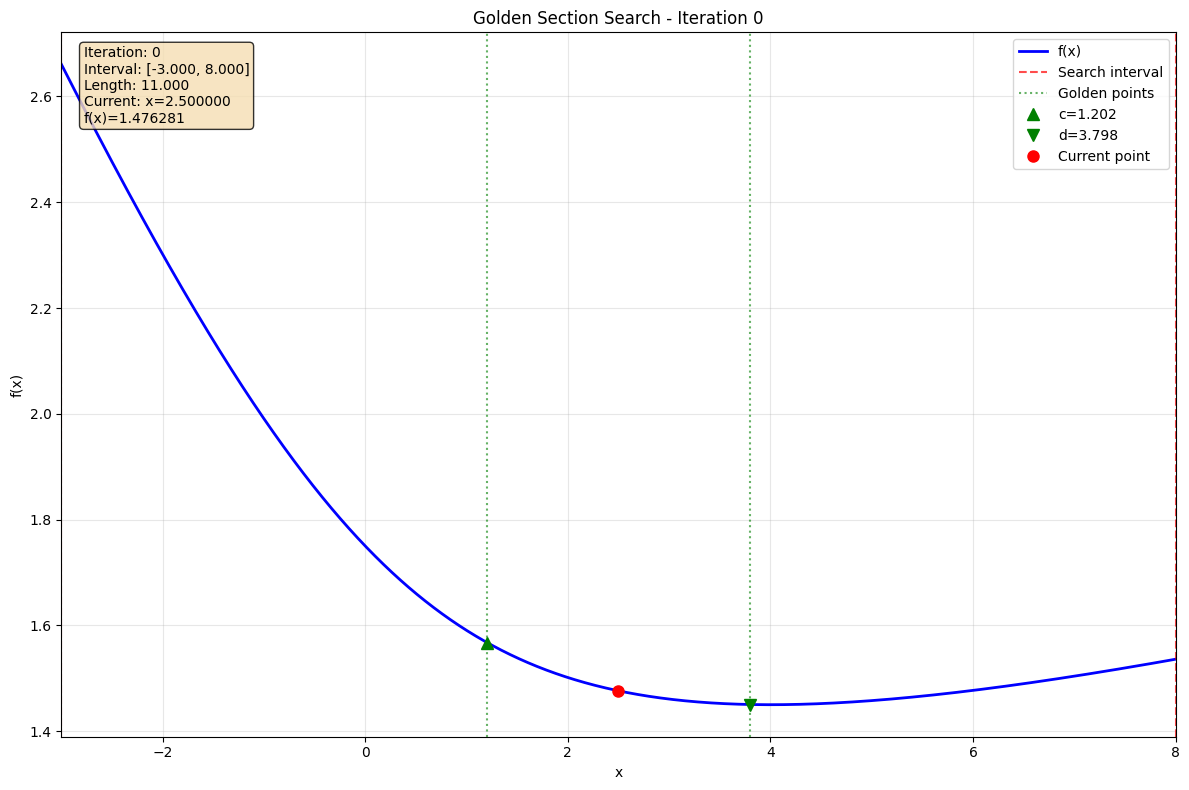

1: f(4.600813) = 1.452961 (+1.201626 - +8.000000)


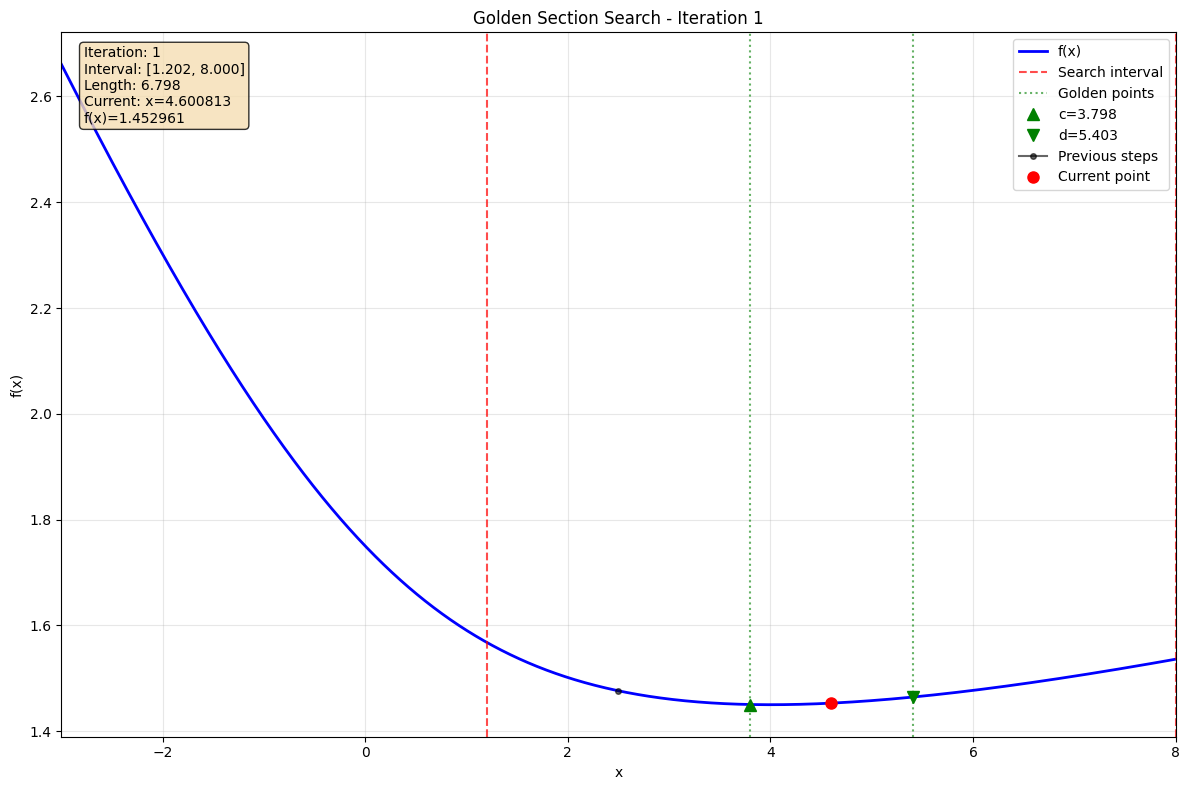

2: f(3.302439) = 1.454919 (+1.201626 - +5.403252)


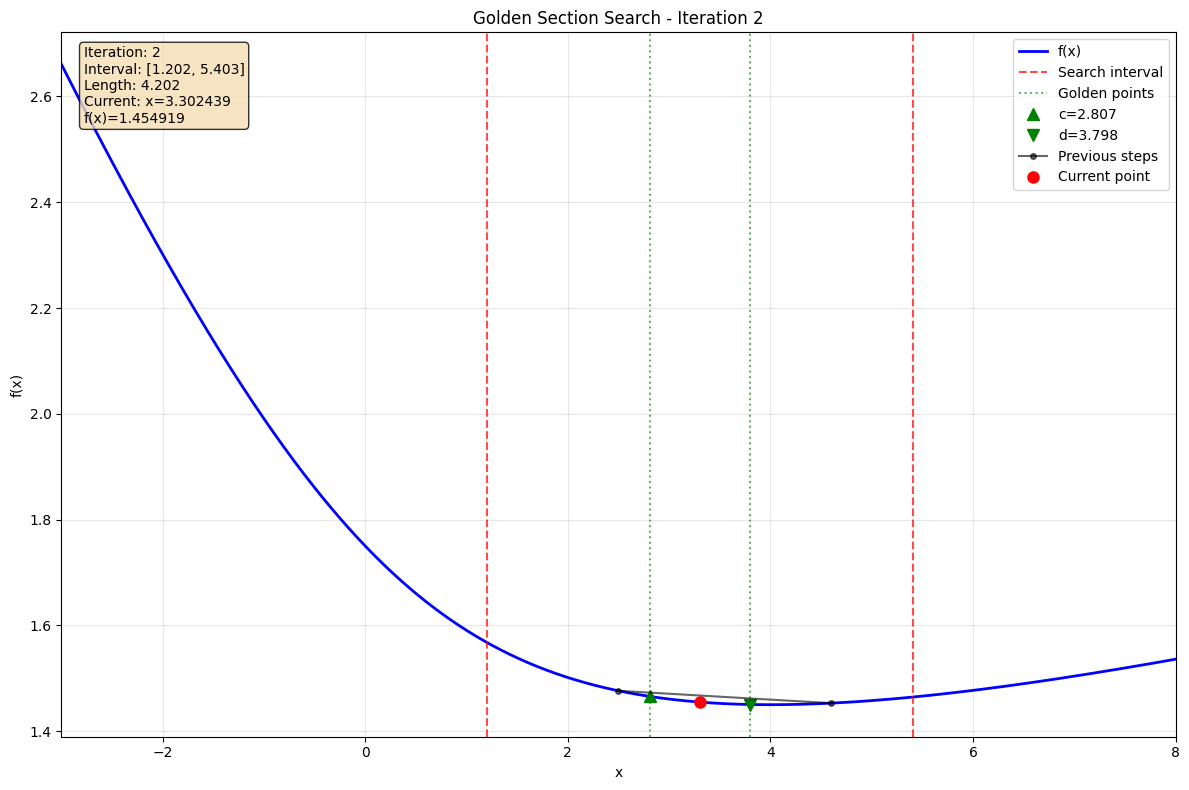

3: f(4.104878) = 1.450097 (+2.806504 - +5.403252)


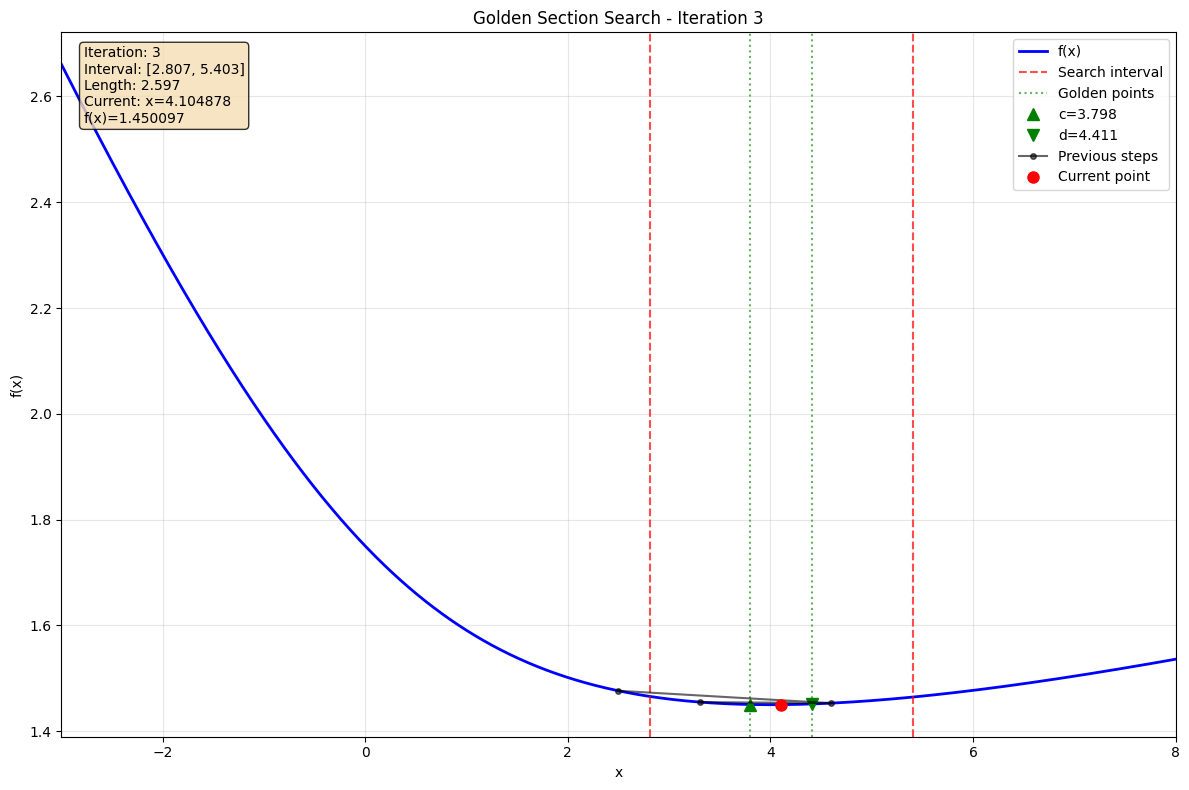

4: f(3.608944) = 1.451467 (+2.806504 - +4.411383)


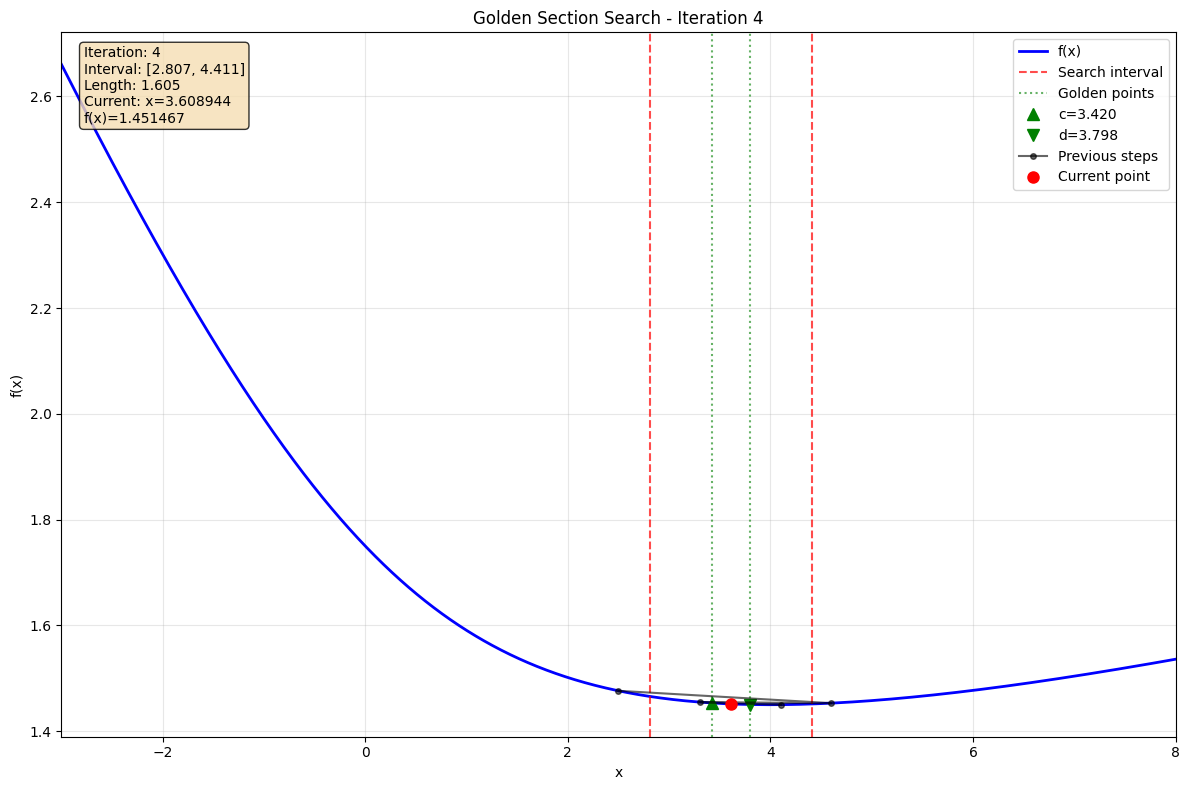

5: f(3.915448) = 1.450065 (+3.419513 - +4.411383)


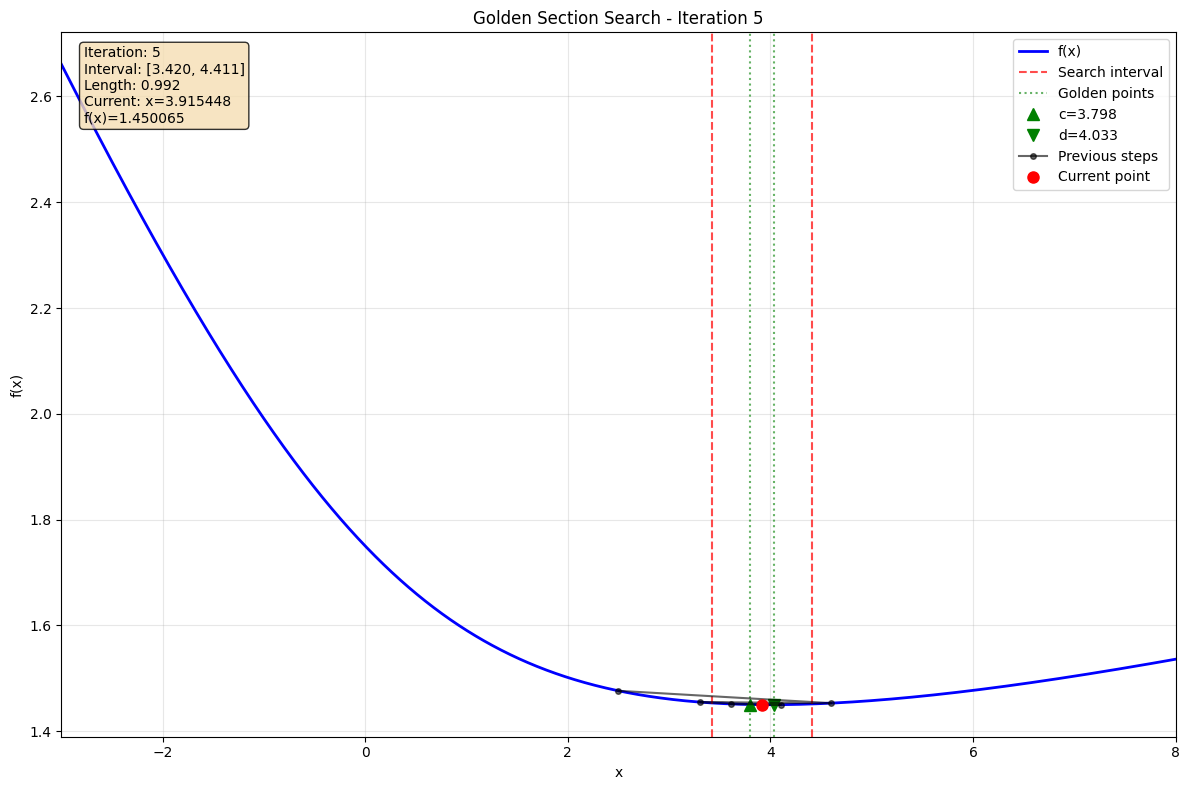


Golden-section result: x* = 4.10487837, f(x*) = 1.4500973577
time: 0.490532



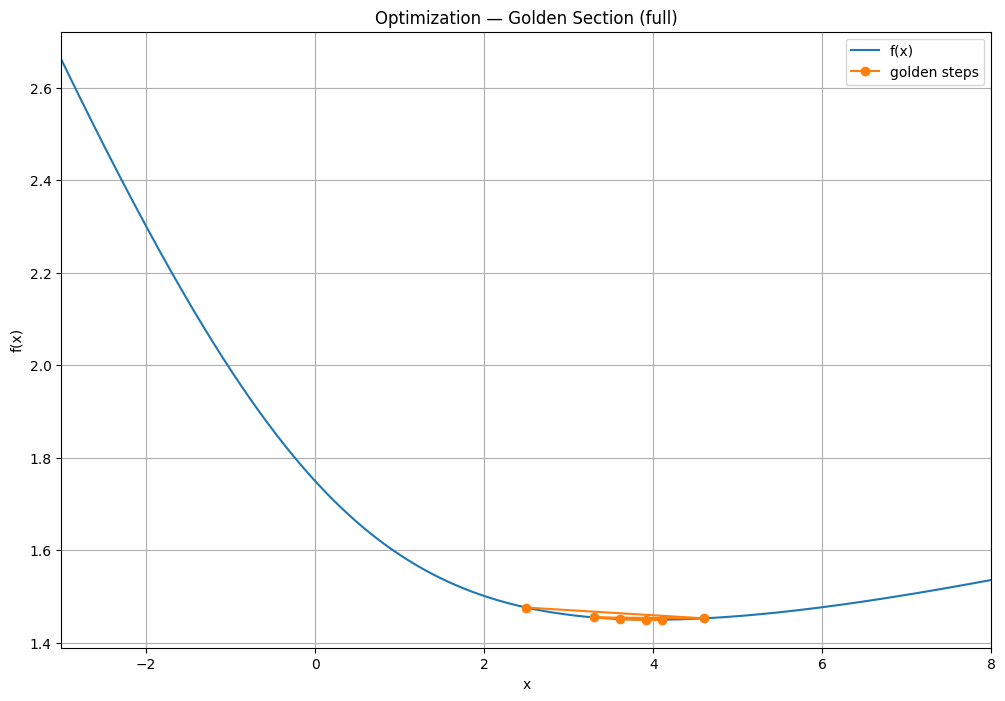

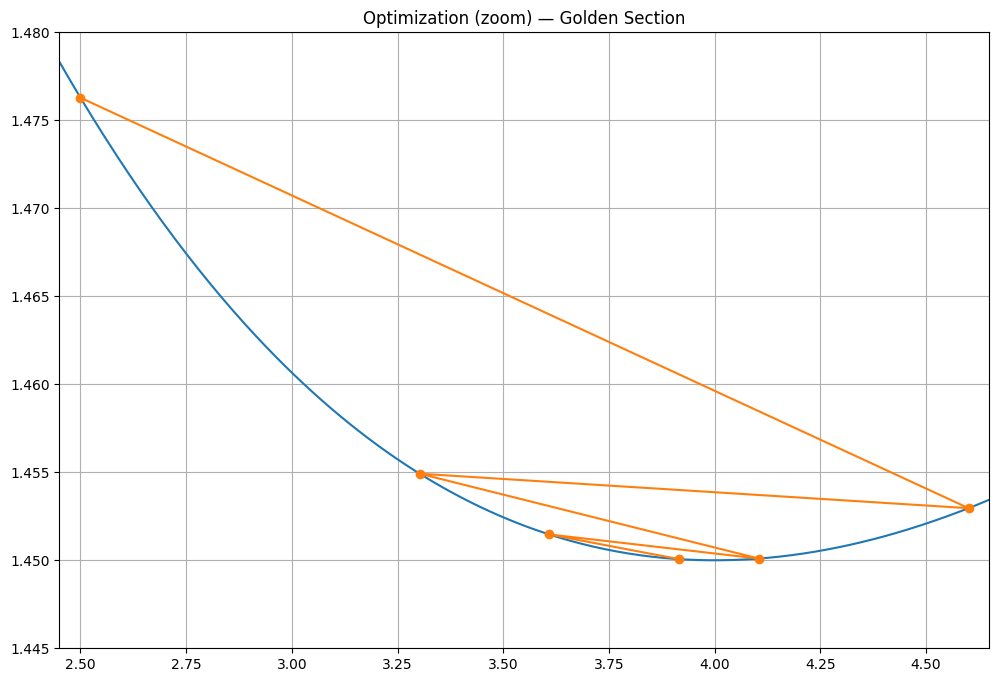

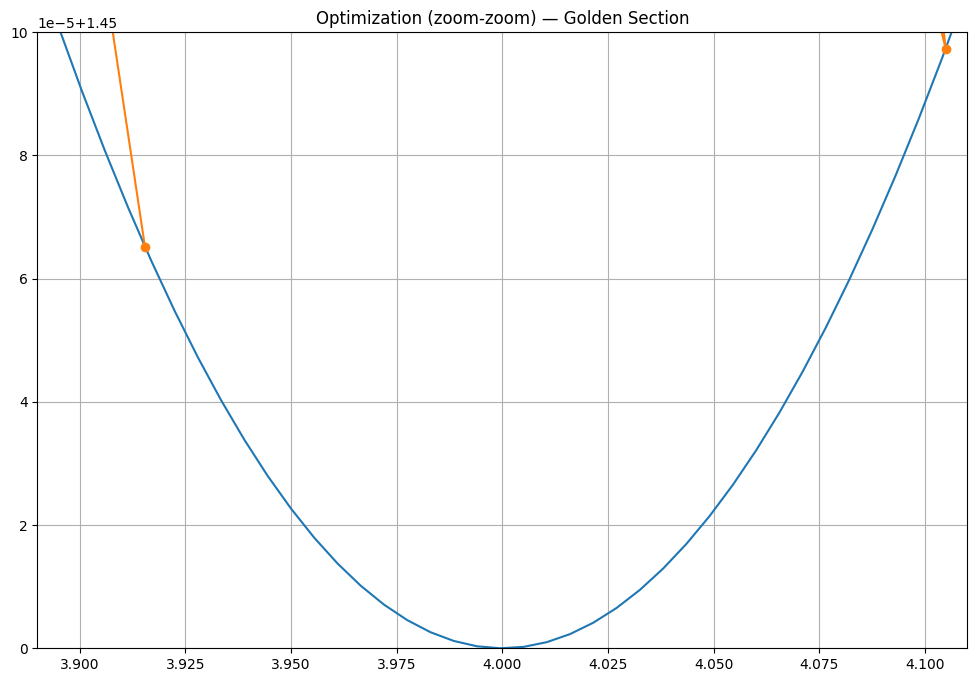

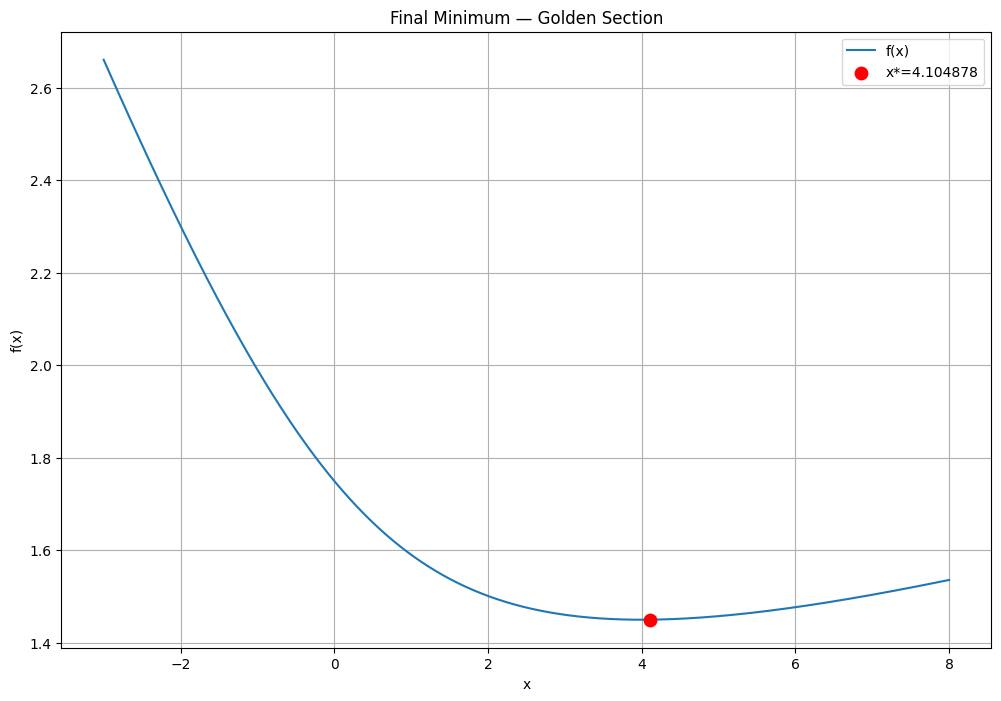

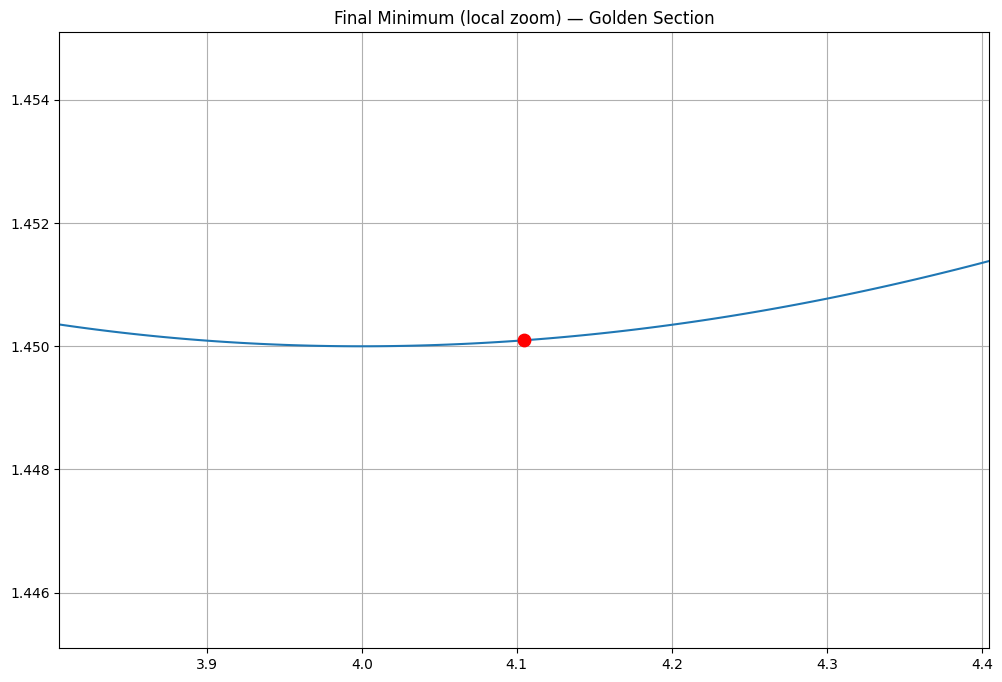

In [16]:
import math
import time
from typing import Callable, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

A = -3.0
B = 8.0
EPS_X = 5e-2
EPS_F = 0.001
N = 14
SAMPLE_COUNT = 2000 

def f(x: float) -> float:
    return math.sqrt(x*x + 9.0)/4.0 + (5.0 - x)/5.0

def golden_section_search(func: Callable[[float], float],
                          a: float, b: float,
                          eps_x: float, eps_f: float,
                          max_iter: int) -> Tuple[float, float, List[float], List[float]]:
    phy = (1.0 + math.sqrt(5.0)) / 2.0
    rho = phy - 1.0
    n = max_iter

    trace_x, trace_f = [], []
    
    xs = np.linspace(A, B, SAMPLE_COUNT)
    ys = np.array([func(x) for x in xs])

    iteration_count = 0
    
    while True:
        mid = (a + b) / 2.0
        trace_x.append(mid)
        trace_f.append(func(mid))
        step_no = max_iter - n
        print(f"{step_no}: f({mid:.6f}) = {func(mid):.6f} ({a:+f} - {b:+f})")

        plt.figure(figsize=(12, 8))
        plt.plot(xs, ys, 'b-', label='f(x)', linewidth=2)
        plt.axvline(a, color='red', linestyle='--', alpha=0.7, label='Search interval')
        plt.axvline(b, color='red', linestyle='--', alpha=0.7)
        
        r = rho * (b - a)
        c = b - r
        d = a + r
        
        plt.axvline(c, color='green', linestyle=':', alpha=0.6, label='Golden points')
        plt.axvline(d, color='green', linestyle=':', alpha=0.6)
        plt.plot(c, func(c), 'g^', markersize=8, label=f'c={c:.3f}')
        plt.plot(d, func(d), 'gv', markersize=8, label=f'd={d:.3f}')
        
        if len(trace_x) > 1:
            plt.plot(trace_x[:-1], trace_f[:-1], 'ko-', markersize=4, alpha=0.6, label='Previous steps')
        plt.plot(trace_x[-1], trace_f[-1], 'ro', markersize=8, label='Current point')
        
        plt.xlim(A, B)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f'Golden Section Search - Iteration {step_no}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        plt.text(0.02, 0.98, f'Iteration: {step_no}\nInterval: [{a:.3f}, {b:.3f}]\nLength: {b-a:.3f}\nCurrent: x={mid:.6f}\nf(x)={func(mid):.6f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

        if n <= 0 or (b - a) < eps_x:
            break

        fc, fd = func(c), func(d)
        if fc <= fd:
            b = d
        else:
            a = c
        n -= 1

        if abs(fc - fd) < eps_f:
            break

    x_star = (a + b) / 2.0
    return x_star, func(x_star), trace_x, trace_f

def show_all_plots(xs, ys, steps_x, steps_f, x_star, f_star, prefix="golden"):
    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.plot(steps_x, steps_f, 'o-', label='golden steps')
    plt.title('Optimization — Golden Section (full)')
    plt.xlabel('x'); plt.ylabel('f(x)')
    plt.xlim(A, B); plt.grid(); plt.legend()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 'o-')
    plt.xlim(2.45, 4.65); plt.ylim(1.445, 1.48)
    plt.title('Optimization (zoom) — Golden Section')
    plt.grid(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 'o-')
    plt.xlim(3.89, 4.11); plt.ylim(1.45, 1.4501)
    plt.title('Optimization (zoom-zoom) — Golden Section')
    plt.grid(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10, label=f"x*={x_star:.6f}")
    plt.title('Final Minimum — Golden Section')
    plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(); plt.legend(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys)
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10)
    plt.xlim(x_star - 0.3, x_star + 0.3)
    plt.ylim(f_star - 0.005, f_star + 0.005)
    plt.title('Final Minimum (local zoom) — Golden Section')
    plt.grid(); plt.show()

xs = np.linspace(A, B, SAMPLE_COUNT)
ys = np.array([f(x) for x in xs])

print("\nGolden-section:")
start_time = time.perf_counter()
x_star, f_star, trace_x, trace_f = golden_section_search(f, A, B, EPS_X, EPS_F, N)
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"\nGolden-section result: x* = {x_star:.8f}, f(x*) = {f_star:.10f}")
print(f"time: {elapsed_time:.6f}\n")

show_all_plots(xs, ys, trace_x, trace_f, x_star, f_star)

## Метод равномерного поиска

$$
\min_{x\in[a,b]} f(x),\qquad f:[a,b]\to\mathbb{R}
$$

$$
m\ge 2,\qquad h=\frac{b-a}{m-1},\qquad
x_i=a+i\,h,\quad i=0,1,\dots,m-1
$$

$$
f_i=f(x_i),\qquad
i^\star=\arg\min_{\,i\in\{0,\dots,m-1\}} f_i,\qquad
x^\star=x_{i^\star},\quad f(x^\star)=\min_i f_i
$$

$$
\text{(при унимодальной }f\text{):}\quad
x_{\min}\in\bigl[x_{i^\star-1},\,x_{i^\star+1}\bigr]\cap[a,b],\qquad
|x_{\min}-x^\star|\ \lesssim\ \frac{h}{2}
$$

$$
\text{обозн.: } m\ \text{— число узлов (напр., }m=N\text{);}\ 
h\ \text{— шаг сетки (напр., }h\le\varepsilon_x\text{);}\ 
x_i\ \text{— узлы},
$$

$$
\ f_i\ \text{— значения на узлах},
$$

$$
\
x^\star\ \text{— лучший узел},\ X=[a,b].
$$

$$
    M \geq \frac{b-a}{2\epsilon}
$$


Uniform:
0: f(2.500000) = 1.476281 (-3.000000 - +8.000000)


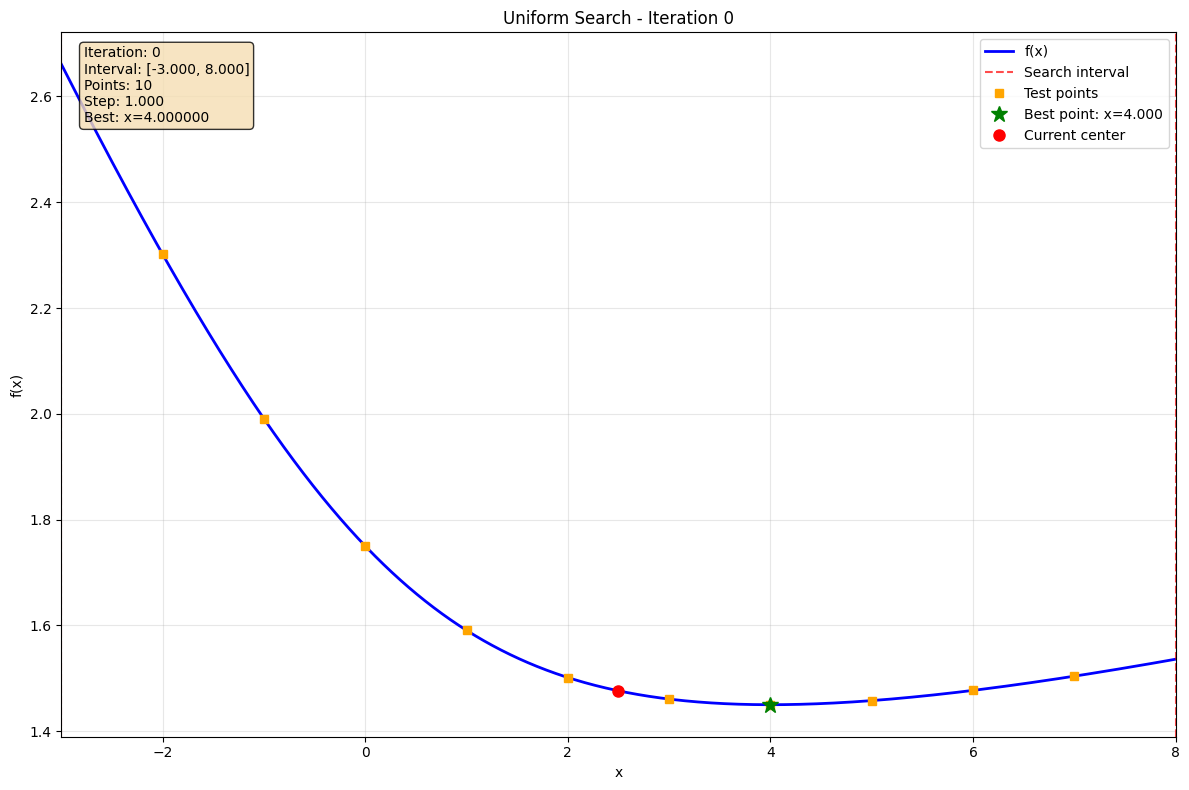

1: f(4.000000) = 1.450000 (+3.000000 - +5.000000)


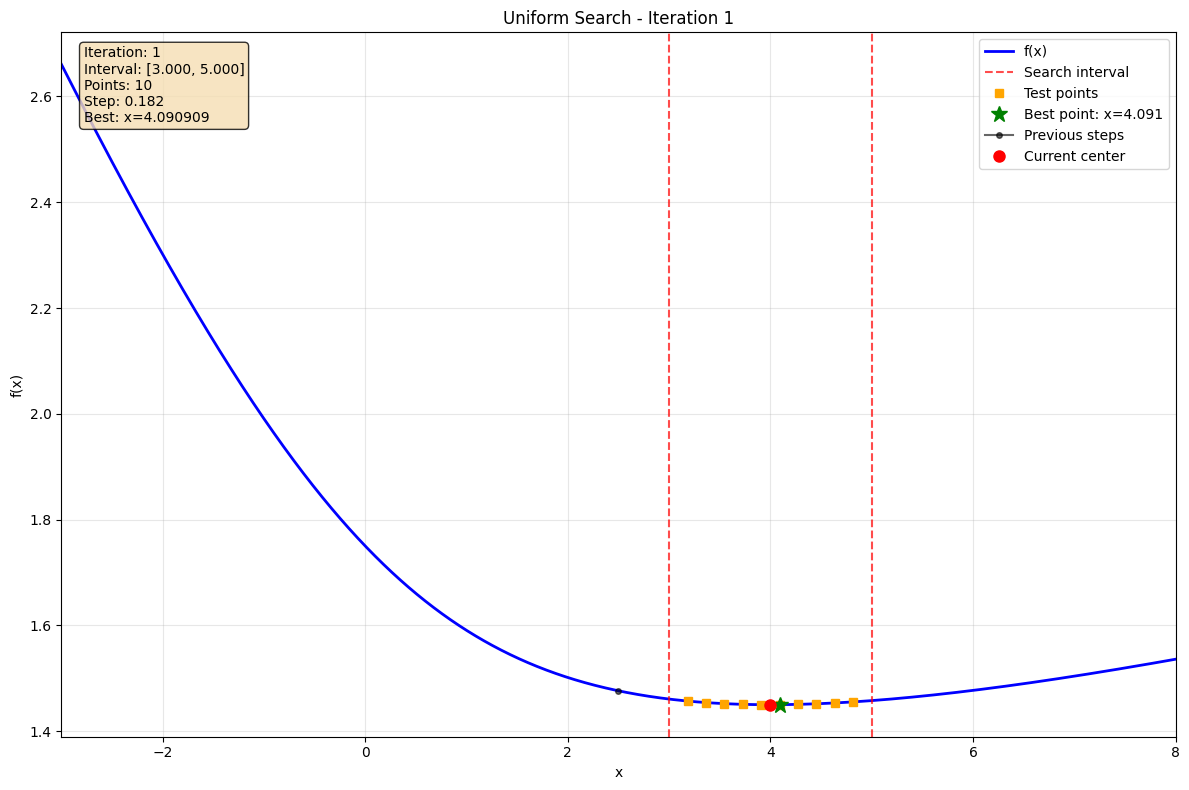

2: f(4.090909) = 1.450073 (+3.909091 - +4.272727)


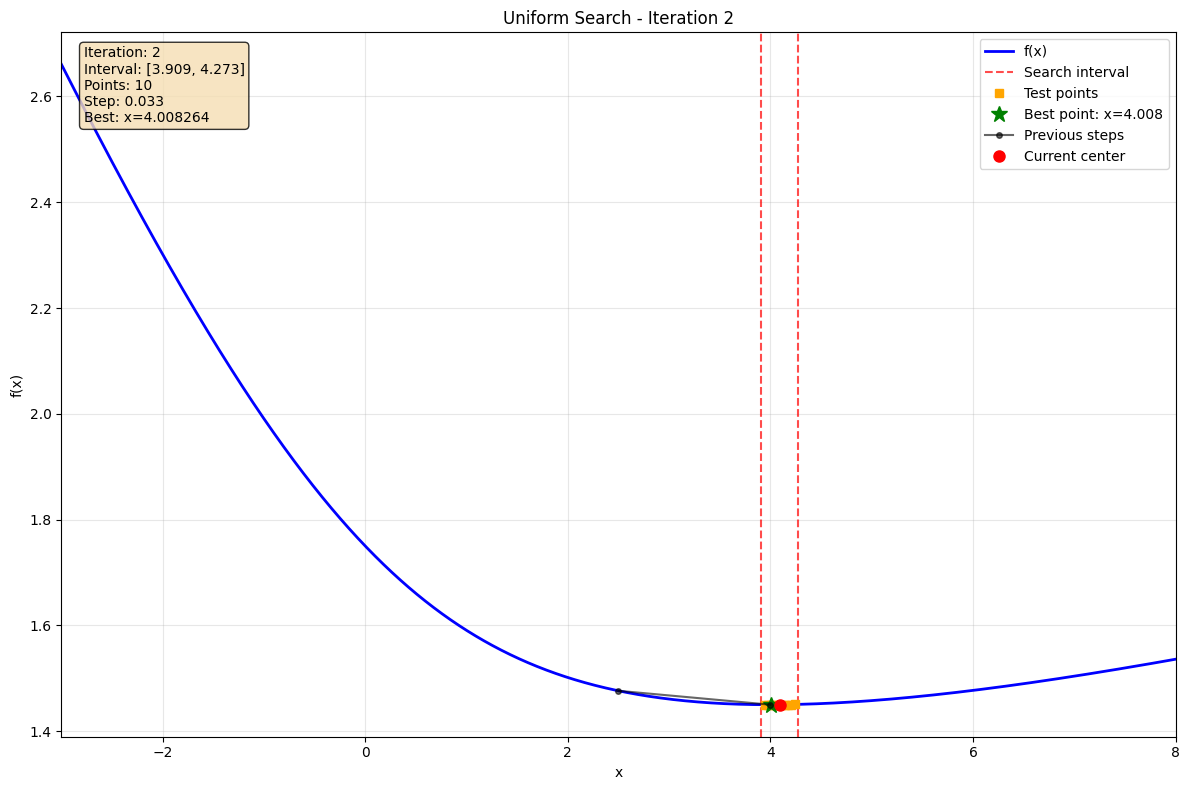


Uniform result: x* = 4.00826446, f(x*) = 1.4500006139
time: 0.234032



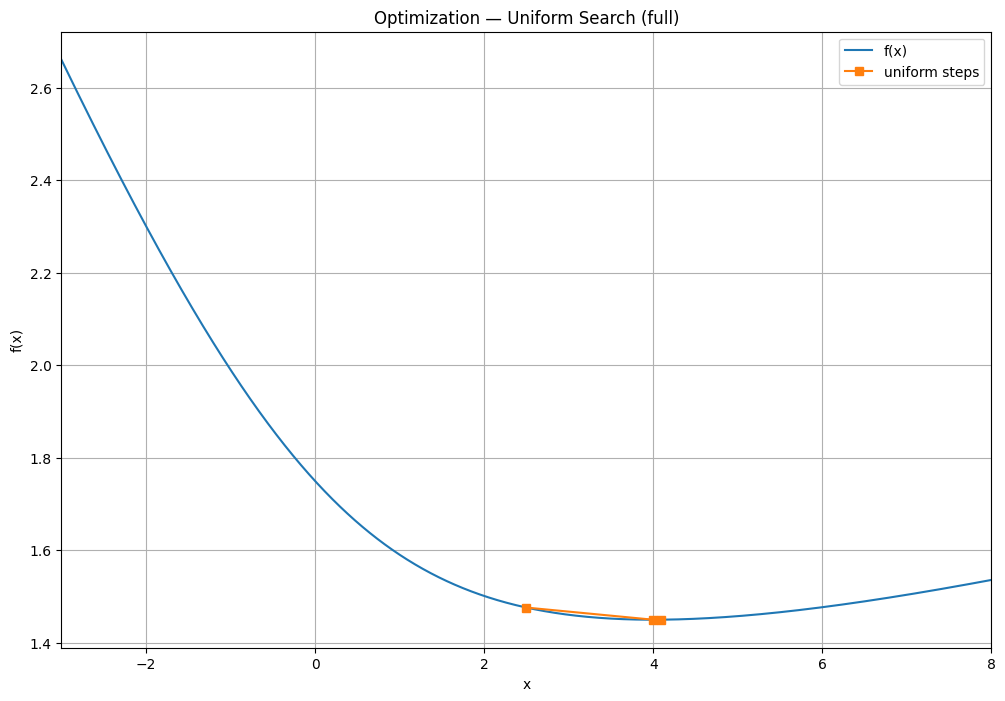

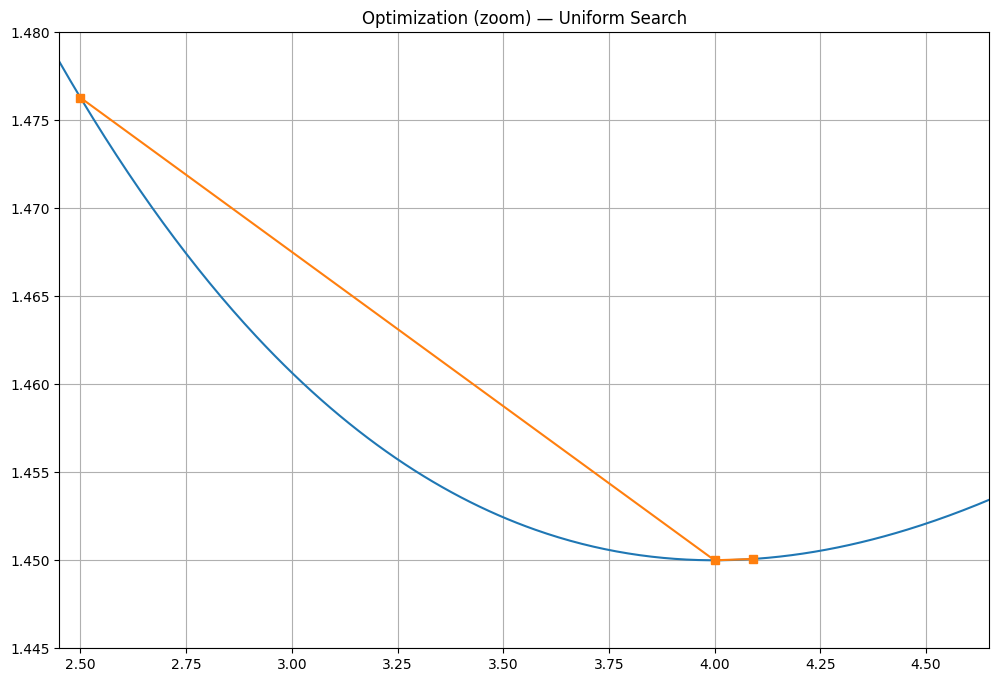

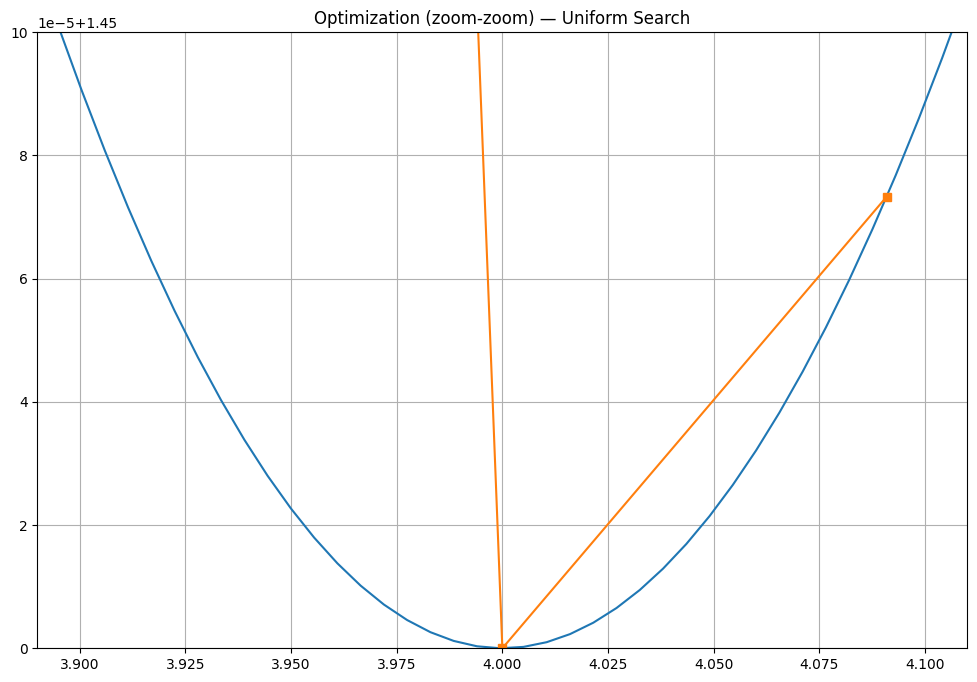

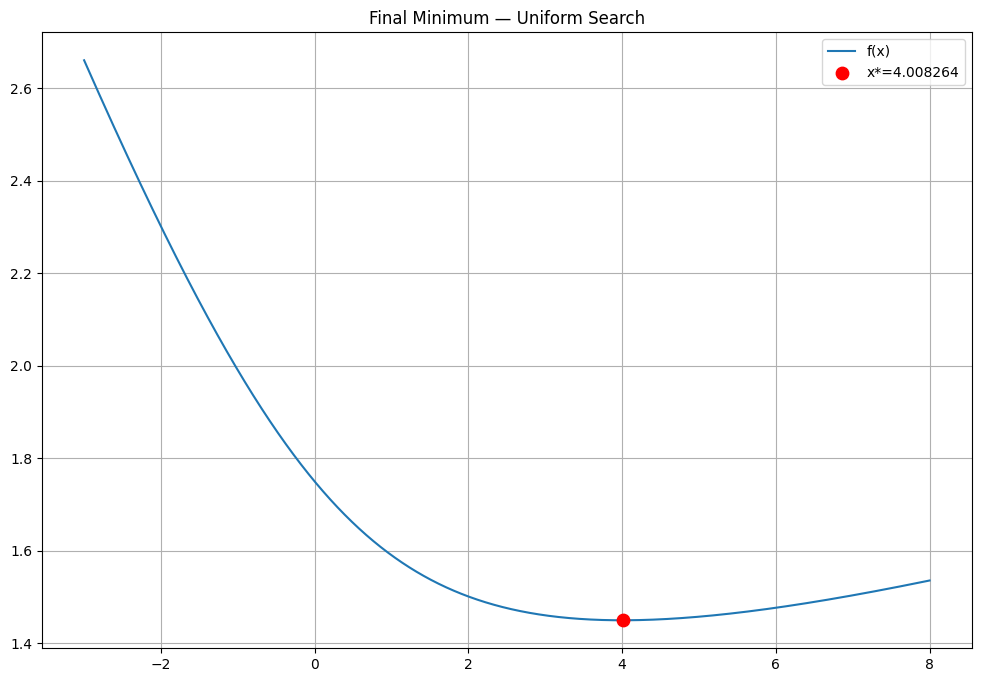

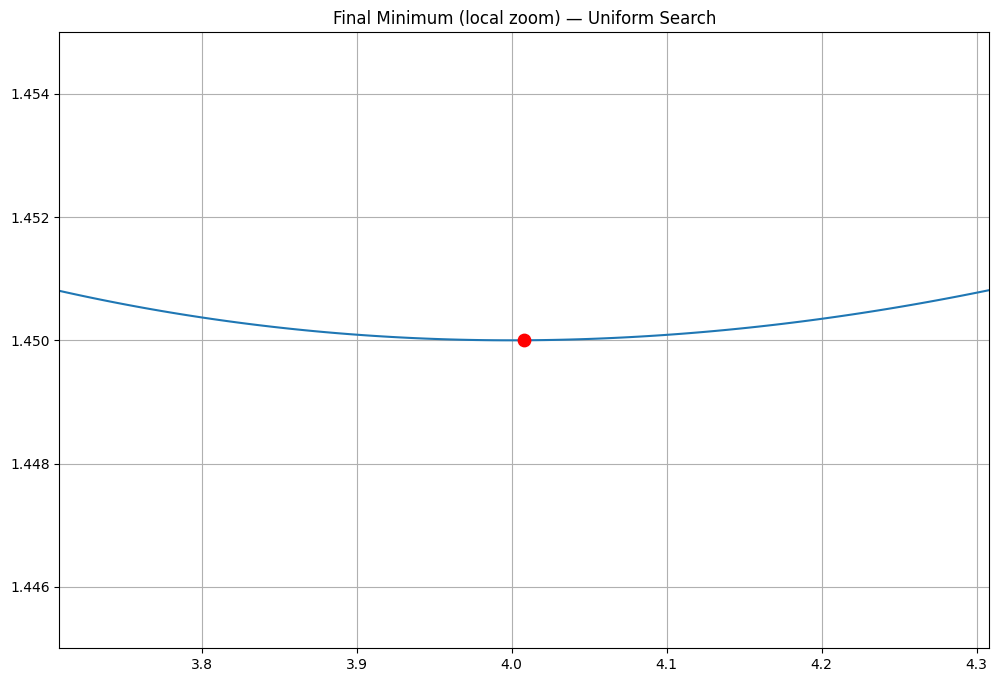

In [17]:
import math
import time
from typing import Callable, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

A = -3.0
B = 8.0
EPS_X = 5e-2
EPS_F = 1e-5
N = 10
M = 10
SAMPLE_COUNT = 2000

def f(x: float) -> float:
    return math.sqrt(x*x + 9.0)/4.0 + (5.0 - x)/5.0

def uniform_search(func: Callable[[float], float],
                   a: float, b: float,
                   eps_x: float, eps_f: float,
                   max_iter: int, m: int) -> Tuple[float, float, List[float], List[float]]:
    assert m > 2
    n = max_iter
    trace_x, trace_f = [], []
    
    xs = np.linspace(A, B, SAMPLE_COUNT)
    ys = np.array([func(x) for x in xs])

    while True:
        mid = (a + b) / 2.0
        trace_x.append(mid)
        trace_f.append(func(mid))
        step_no = max_iter - n
        print(f"{step_no}: f({mid:.6f}) = {func(mid):.6f} ({a:+f} - {b:+f})")

        plt.figure(figsize=(12, 8))
        plt.plot(xs, ys, 'b-', label='f(x)', linewidth=2)
        plt.axvline(a, color='red', linestyle='--', alpha=0.7, label='Search interval')
        plt.axvline(b, color='red', linestyle='--', alpha=0.7)
        
        dx = (b - a) / (m + 1)
        test_points = [a + i*dx for i in range(1, m+1)]
        test_values = [func(x) for x in test_points]
        
        plt.plot(test_points, test_values, 's', color='orange', markersize=6, label='Test points')
        
        min_i, min_fx = 1, func(a + dx)
        for i in range(2, m+1):
            x = a + i*dx
            fx = func(x)
            if fx < min_fx:
                min_i, min_fx = i, fx
                
        best_point = a + min_i*dx
        plt.plot(best_point, min_fx, 'g*', markersize=12, label=f'Best point: x={best_point:.3f}')
        
        if len(trace_x) > 1:
            plt.plot(trace_x[:-1], trace_f[:-1], 'ko-', markersize=4, alpha=0.6, label='Previous steps')
        plt.plot(trace_x[-1], trace_f[-1], 'ro', markersize=8, label='Current center')
        
        plt.xlim(A, B)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f'Uniform Search - Iteration {step_no}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        plt.text(0.02, 0.98, f'Iteration: {step_no}\nInterval: [{a:.3f}, {b:.3f}]\nPoints: {m}\nStep: {dx:.3f}\nBest: x={best_point:.6f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()

        if n <= 0 or (b - a) < eps_x:
            break

        old_a, old_b = a, b
        a = a + (min_i - 1)*dx
        b = a + 2*dx
        n -= 1

        if (b - a)/2 < eps_x:
            break
        if abs(func((old_a + old_b)/2) - min_fx) < eps_f:
            break

    x_star = (a + b)/2
    return x_star, func(x_star), trace_x, trace_f

def show_all_plots(xs, ys, steps_x, steps_f, x_star, f_star, prefix="uniform"):
    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.plot(steps_x, steps_f, 's-', label='uniform steps')
    plt.title('Optimization — Uniform Search (full)')
    plt.xlabel('x'); plt.ylabel('f(x)')
    plt.xlim(A, B); plt.grid(); plt.legend(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 's-')
    plt.xlim(2.45, 4.65); plt.ylim(1.445, 1.48)
    plt.title('Optimization (zoom) — Uniform Search'); plt.grid(); plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(xs, ys); plt.plot(steps_x, steps_f, 's-')
    plt.xlim(3.89, 4.11); plt.ylim(1.45, 1.4501)
    plt.title('Optimization (zoom-zoom) — Uniform Search'); plt.grid(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys, label='f(x)')
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10, label=f"x*={x_star:.6f}")
    plt.title('Final Minimum — Uniform Search'); plt.grid(); plt.legend(); plt.show()

    plt.figure(figsize=(12,8))
    plt.plot(xs, ys)
    plt.scatter([x_star], [f_star], c='red', s=80, zorder=10)
    plt.xlim(x_star - 0.3, x_star + 0.3)
    plt.ylim(f_star - 0.005, f_star + 0.005)
    plt.title('Final Minimum (local zoom) — Uniform Search'); plt.grid(); plt.show()

xs = np.linspace(A, B, SAMPLE_COUNT)
ys = np.array([f(x) for x in xs])

print("\nUniform:")
start_time = time.perf_counter()
x_star, f_star, trace_x, trace_f = uniform_search(f, A, B, EPS_X, EPS_F, N, M)
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"\nUniform result: x* = {x_star:.8f}, f(x*) = {f_star:.10f}")
print(f"time: {elapsed_time:.6f}\n")

show_all_plots(xs, ys, trace_x, trace_f, x_star, f_star)

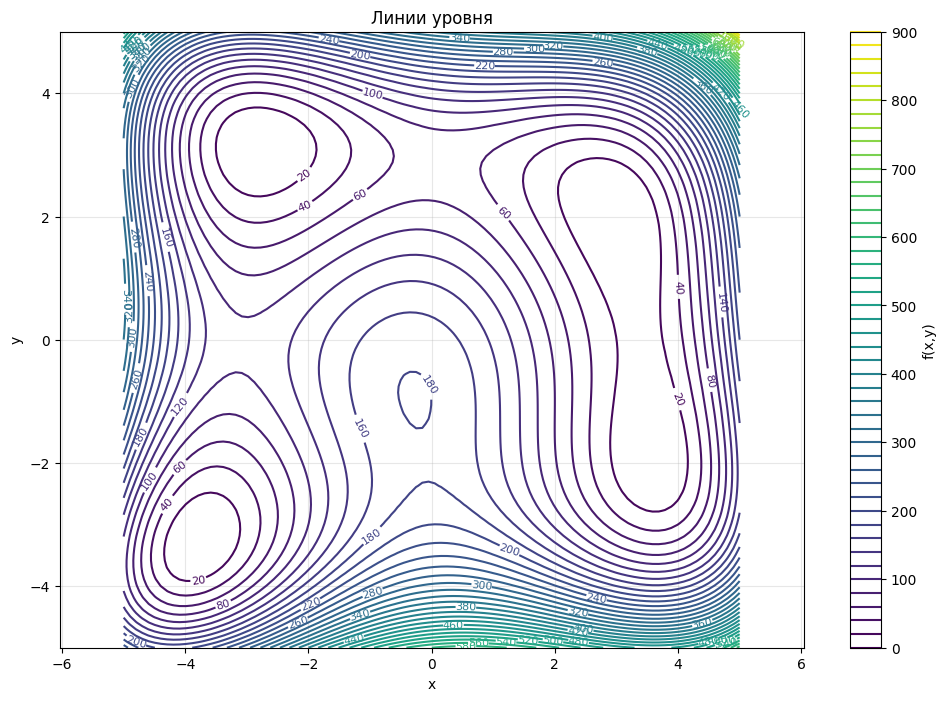

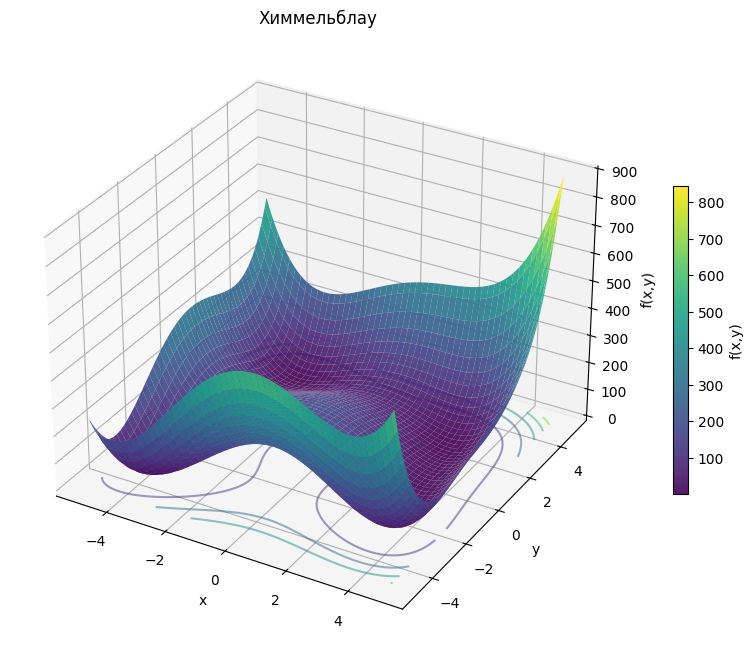

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.colorbar(contour, label='f(x,y)')
plt.title('Линии уровня')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9, 
                      linewidth=0, antialiased=True)

ax.contour(X, Y, Z, zdir='z', offset=Z.min(), cmap='viridis', alpha=0.5)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20, label='f(x,y)')
ax.set_title('Химмельблау')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

plt.show()

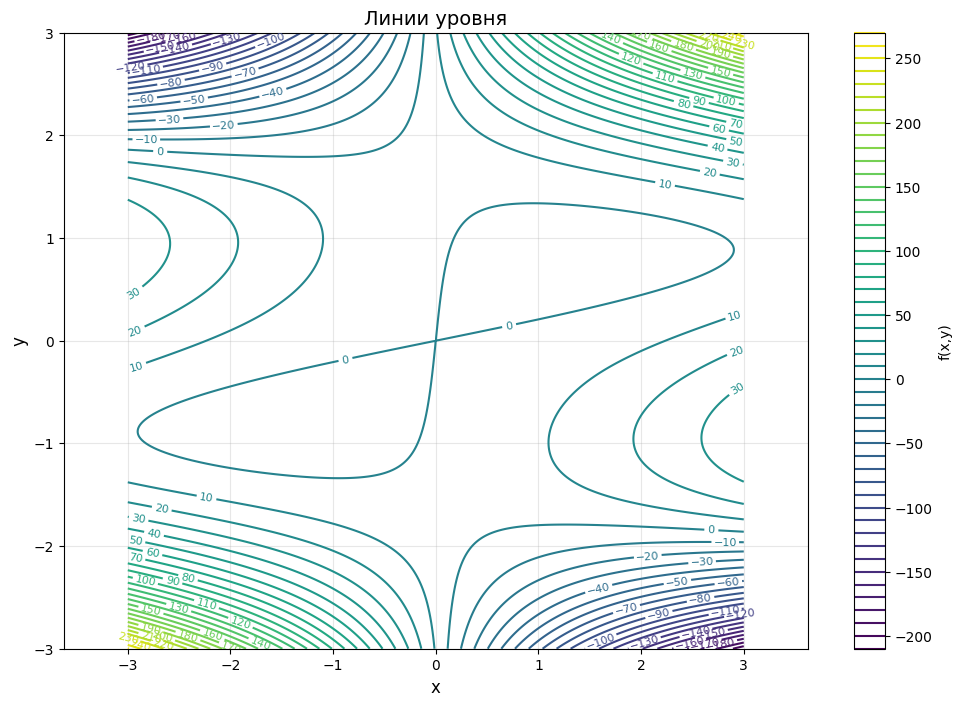

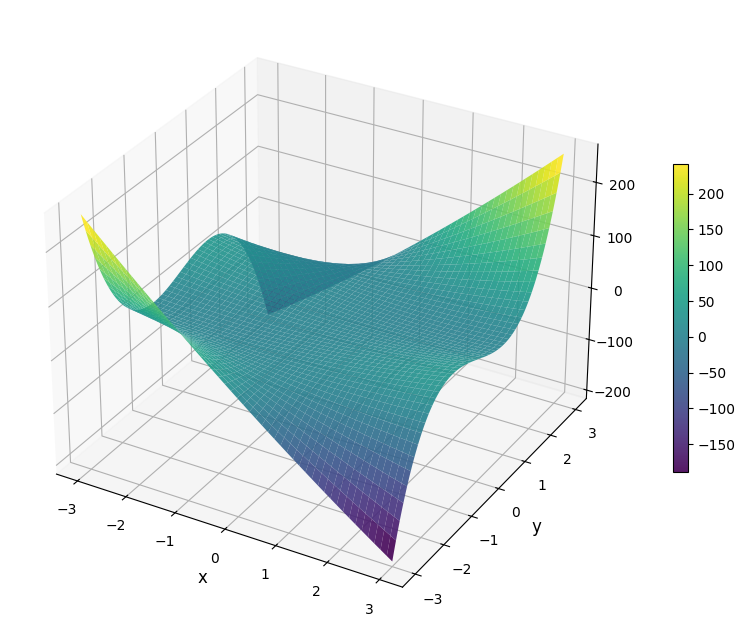

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 2*x**2 + 4*x*y**3 - 10*x*y + y**2

x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(12, 8))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='f(x,y)')
plt.clabel(contour, inline=True, fontsize=8)

plt.title('Линии уровня', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)

plt.show()

# Лабораторная работа №2: Градиентный спуск

## Константный шаг

### Функция Химмельблау

Градиентный спуск для функции Химмельблау
Постоянный шаг: 0.01
Максимум итераций: 100
--------------------------------------------------
Начальная точка: (1, 3)
--------------------------------------------------
Итерация 0: (1.2200, 2.7800), f=49.110701, градиент=31.112698
Итерация 1: (1.5095, 2.6980), f=39.479591, градиент=30.093009
Итерация 2: (1.8375, 2.6254), f=27.977084, градиент=33.585626
Итерация 3: (2.1702, 2.5437), f=16.727191, градиент=34.265590
Итерация 4: (2.4626, 2.4517), f=8.339813, градиент=30.654302
Итерация 5: (2.6778, 2.3569), f=3.687270, градиент=23.515605
Итерация 6: (2.8109, 2.2701), f=1.616746, градиент=15.884352
Итерация 7: (2.8848, 2.1991), f=0.749059, градиент=10.247068
Итерация 8: (2.9256, 2.1453), f=0.365919, градиент=6.757580
Итерация 9: (2.9496, 2.1059), f=0.185317, градиент=4.613195
Итерация 10: (2.9648, 2.0774), f=0.096154, градиент=3.229243
Итерация 11: (2.9749, 2.0567), f=0.050739, градиент=2.298694
Итерация 12: (2.9819, 2.0417), f=0.027098, градиент=1.

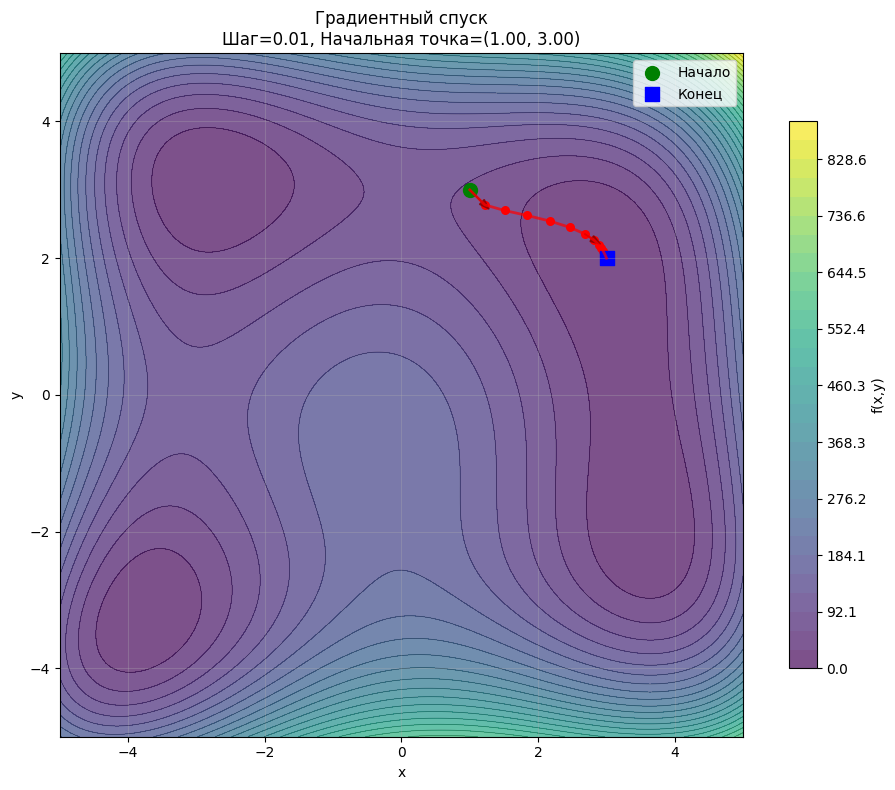


Результаты:
Начальная точка: (1.0000, 3.0000)
Конечная точка: (3.0000, 2.0000)
Начальное f: 58.000000
Конечное f: 0.000000
Изменение f: 58.000000
Всего итераций: 60


In [4]:
import numpy as np
import matplotlib.pyplot as plt

STEP_CONST = 0.01
MAX_ITER = 100
TOLERANCE = 1e-6

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradient(func, x, y, epsilon=1e-6):
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

def gradient_descent(func, const_step, start_point, max_iter=MAX_ITER, tol=TOLERANCE):
    x, y = start_point
    history = [(x, y, func(x, y))]

    for i in range(max_iter):
        grad = gradient(func, x, y)

        # Условие остановки
        if np.linalg.norm(grad) < tol:
            print(f"Сходимость на итерации {i}")
            break

        # Шаг градиентного спуска
        x = x - const_step * grad[0]
        y = y - const_step * grad[1]

        history.append((x, y, func(x, y)))
        print(f"Итерация {i}: ({x:.4f}, {y:.4f}), f={func(x, y):.6f}, градиент={np.linalg.norm(grad):.6f}")

    return history

def plot_gradient_on_contour(history, func):
    # Траектория
    points = np.array([(p[0], p[1]) for p in history])
    x_path, y_path = points[:, 0], points[:, 1]

    # Сетка для линий уровня
    x_vals = np.linspace(-5, 5, 300)
    y_vals = np.linspace(-5, 5, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(10, 8))

    # Линии уровня
    levels = np.linspace(Z.min(), Z.max(), 30)
    contour = ax.contourf(X, Y, Z, levels=levels, alpha=0.7, cmap='viridis')
    ax.contour(X, Y, Z, levels=levels, colors='black', alpha=0.3, linewidths=0.5)

    # Траектория
    ax.plot(x_path, y_path, 'r-', linewidth=2, alpha=0.7)
    ax.scatter(x_path, y_path, c='red', s=30)
    ax.scatter(x_path[0], y_path[0], c='green', s=100, marker='o', label='Начало')
    ax.scatter(x_path[-1], y_path[-1], c='blue', s=100, marker='s', label='Конец')

    # Стрелки направления
    for i in range(0, len(x_path)-1, max(1, len(x_path)//10)):
        dx = x_path[i+1] - x_path[i]
        dy = y_path[i+1] - y_path[i]
        if np.sqrt(dx**2 + dy**2) > 0.1:
            ax.arrow(x_path[i], y_path[i], dx*0.8, dy*0.8,
                    head_width=0.1, head_length=0.15,
                    fc='darkred', ec='darkred', alpha=0.8)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Градиентный спуск\nШаг={STEP_CONST}, Начальная точка=({history[0][0]:.2f}, {history[0][1]:.2f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal', 'box')

    plt.colorbar(contour, ax=ax, shrink=0.8, label='f(x,y)')
    plt.tight_layout()
    plt.show()

    print(f"\nРезультаты:")
    print(f"Начальная точка: ({history[0][0]:.4f}, {history[0][1]:.4f})")
    print(f"Конечная точка: ({history[-1][0]:.4f}, {history[-1][1]:.4f})")
    print(f"Начальное f: {history[0][2]:.6f}")
    print(f"Конечное f: {history[-1][2]:.6f}")
    print(f"Изменение f: {history[0][2] - history[-1][2]:.6f}")
    print(f"Всего итераций: {len(history)-1}")

if __name__ == "__main__":
    print(f"Постоянный шаг: {STEP_CONST}")
    print(f"Максимум итераций: {MAX_ITER}")

    start_point = (1, 3)

    print(f"Начальная точка: {start_point}")
    print("-" * 50)

    history = gradient_descent(f, STEP_CONST, start_point)

    if len(history) > 1:
        plot_gradient_on_contour(history, f)
    else:
        print("Не удалось выполнить градиентный спуск")

### Функция $f(x,y) = 2x^2 + 4xy^3 - 10xy + y^2$

Постоянный шаг: 0.01
Максимум итераций: 100
Начальная точка: (1, 0.5)
--------------------------------------------------
Итерация 0: (1.0050, 0.5600), f=-2.588374, градиент=6.020797
Итерация 1: (1.0138, 0.6115), f=-2.842497, градиент=5.222242
Итерация 2: (1.0252, 0.6551), f=-3.032145, градиент=4.513773
Итерация 3: (1.0385, 0.6918), f=-3.173301, градиент=3.894156
Итерация 4: (1.0529, 0.7221), f=-3.278660, градиент=3.361818
Итерация 5: (1.0679, 0.7471), f=-3.358056, градиент=2.913729
Итерация 6: (1.0832, 0.7674), f=-3.418905, градиент=2.544616
Итерация 7: (1.0986, 0.7838), f=-3.466636, градиент=2.246765
Итерация 8: (1.1137, 0.7970), f=-3.505114, градиент=2.010439
Итерация 9: (1.1286, 0.8076), f=-3.537028, градиент=1.824786
Итерация 10: (1.1432, 0.8159), f=-3.564207, градиент=1.678969
Итерация 11: (1.1573, 0.8226), f=-3.587882, градиент=1.563168
Итерация 12: (1.1710, 0.8279), f=-3.608875, градиент=1.469214
Итерация 13: (1.1843, 0.8321), f=-3.627738, градиент=1.390781
Итерация 14: (1.1971,

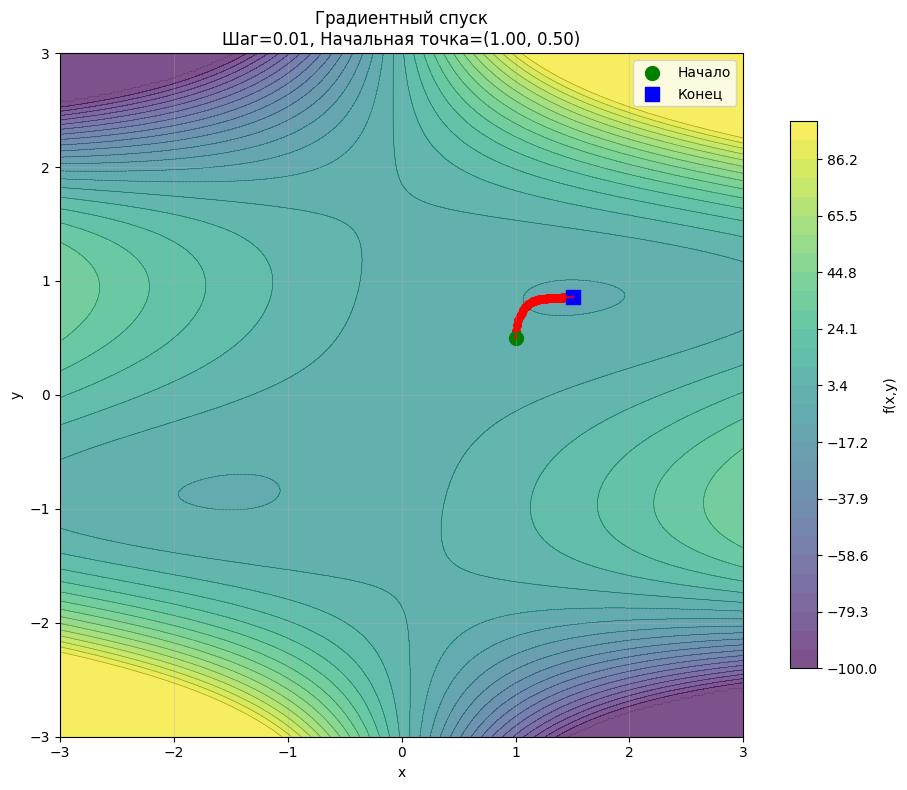


Результаты:
Начальная точка: (1.0000, 0.5000)
Конечная точка: (1.5035, 0.8591)
Начальное f: -2.250000
Конечное f: -3.844246
Изменение f: 1.594246
Всего итераций: 100


In [33]:
import numpy as np
import matplotlib.pyplot as plt

STEP_CONST = 0.01
MAX_ITER = 100
TOLERANCE = 1e-6

def f(x, y):
    return 2*x**2 + 4*x*y**3 - 10*x*y + y**2

def gradient(func, x, y, epsilon=1e-6):
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

def gradient_descent(func, const_step, start_point, max_iter=MAX_ITER, tol=TOLERANCE):
    x, y = start_point
    history = [(x, y, func(x, y))]

    for i in range(max_iter):
        grad = gradient(func, x, y)

        # Условие остановки
        if np.linalg.norm(grad) < tol:
            print(f"Сходимость на итерации {i}")
            break

        # Ограничиваем градиент, чтобы не делать слишком большие шаги
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 100:
            grad = grad / grad_norm * 100  # нормализуем градиент

        # Шаг градиентного спуска
        x_new = x - const_step * grad[0]
        y_new = y - const_step * grad[1]

        # Ограничиваем область поиска
        if abs(x_new) > 10 or abs(y_new) > 10:
            print(f"Точка выходит за пределы на итерации {i}")
            break

        x, y = x_new, y_new
        history.append((x, y, func(x, y)))

        print(f"Итерация {i}: ({x:.4f}, {y:.4f}), f={func(x, y):.6f}, градиент={grad_norm:.6f}")

    return history

def plot_gradient_on_contour(history, func):
    # Траектория
    points = np.array([(p[0], p[1]) for p in history])
    x_path, y_path = points[:, 0], points[:, 1]

    # Фиксированные границы
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3

    # Сетка для линий уровня
    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(10, 8))

    # норм пределы...
    Z_clipped = np.clip(Z, -100, 100)  # ограничиваем значения
    levels = np.linspace(Z_clipped.min(), Z_clipped.max(), 30)

    contour = ax.contourf(X, Y, Z_clipped, levels=levels, alpha=0.7, cmap='viridis')
    ax.contour(X, Y, Z_clipped, levels=levels, colors='black', alpha=0.3, linewidths=0.5)

    # Траектория
    ax.plot(x_path, y_path, 'r-', linewidth=2, alpha=0.7)
    ax.scatter(x_path, y_path, c='red', s=30)
    ax.scatter(x_path[0], y_path[0], c='green', s=100, marker='o', label='Начало')
    ax.scatter(x_path[-1], y_path[-1], c='blue', s=100, marker='s', label='Конец')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Градиентный спуск\nШаг={STEP_CONST}, Начальная точка=({history[0][0]:.2f}, {history[0][1]:.2f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', 'box')

    plt.colorbar(contour, ax=ax, shrink=0.8, label='f(x,y)')
    plt.tight_layout()
    plt.show()

    print(f"\nРезультаты:")
    print(f"Начальная точка: ({history[0][0]:.4f}, {history[0][1]:.4f})")
    print(f"Конечная точка: ({history[-1][0]:.4f}, {history[-1][1]:.4f})")
    print(f"Начальное f: {history[0][2]:.6f}")
    print(f"Конечное f: {history[-1][2]:.6f}")
    if len(history) > 1:
        print(f"Изменение f: {history[0][2] - history[-1][2]:.6f}")
    print(f"Всего итераций: {len(history)-1}")

if __name__ == "__main__":
    print(f"Постоянный шаг: {STEP_CONST}")
    print(f"Максимум итераций: {MAX_ITER}")

    # функция не уходит в бесконечность
    start_point = (1, 0.5)

    print(f"Начальная точка: {start_point}")
    print("-" * 50)

    history = gradient_descent(f, STEP_CONST, start_point)

    if len(history) > 1:
        plot_gradient_on_contour(history, f)
    else:
        print("Не удалось выполнить градиентный спуск")

## Шаг с численным методом

### Функция Химмельблау

Метод наискорейшего спуска для функции Химмельблау
Максимум итераций: 100
--------------------------------------------------
Начальная точка: (1, 3)
--------------------------------------------------
Итерация 0: (1.7601, 2.2399), f=32.110041, градиент=31.112698, шаг=0.034549
Итерация 1: (2.1082, 2.3550), f=18.070790, градиент=42.452691, шаг=0.008637
Итерация 2: (2.4029, 2.3743), f=9.214937, градиент=34.186652, шаг=0.008637
Итерация 3: (2.6217, 2.3382), f=4.385096, градиент=25.671878, шаг=0.008637
Итерация 4: (2.7649, 2.2812), f=2.092369, градиент=17.847033, шаг=0.008637
Итерация 5: (2.8508, 2.2234), f=1.052976, градиент=11.985075, шаг=0.008637
Итерация 6: (2.9010, 2.1736), f=0.559766, градиент=8.191793, шаг=0.008637
Итерация 7: (2.9617, 2.0938), f=0.137677, градиент=5.801333, шаг=0.017275
Итерация 8: (2.9773, 2.0484), f=0.037699, градиент=2.777659, шаг=0.017275
Итерация 9: (2.9893, 2.0269), f=0.010936, градиент=1.426080, шаг=0.017275
Итерация 10: (2.9936, 2.0145), f=0.003263, градиент=

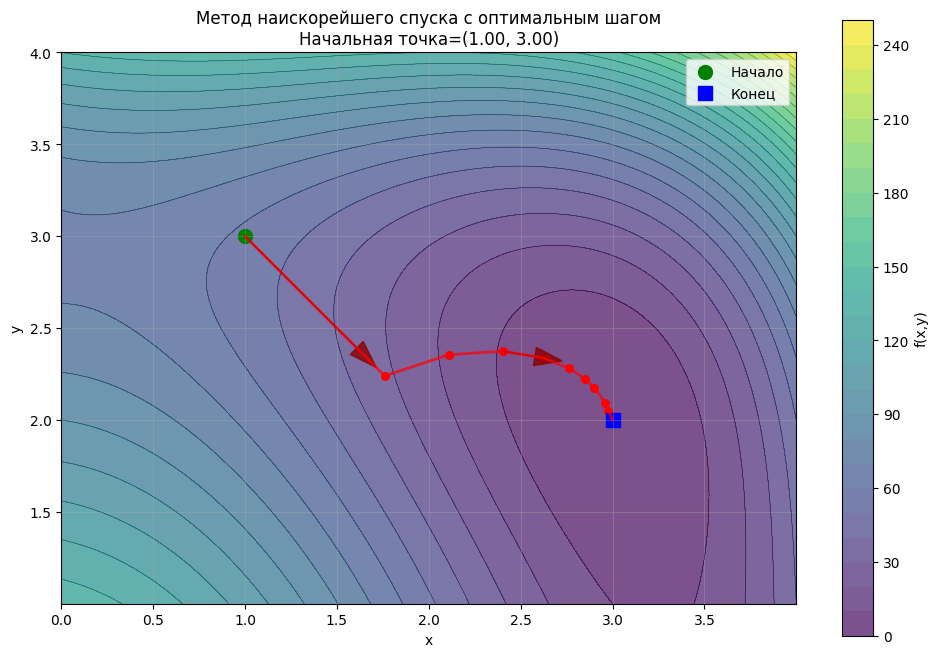


Результаты:
Начальная точка: (1.0000, 3.0000)
Конечная точка: (3.0000, 2.0000)
Начальное f: 58.000000
Конечное f: 0.000000
Изменение f: 58.000000
Всего итераций: 33


In [20]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ITER = 100
TOLERANCE = 1e-6

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradient(func, x, y, epsilon=1e-6):
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

def optimal_step_size(func, x, y, grad):
    d = -grad

    a, b = 0, 1.0
    fa = func(x + a*d[0], y + a*d[1])
    fb = func(x + b*d[0], y + b*d[1])

    # Если функция растет, уменьшаем интервал
    for _ in range(10):
        if fb > fa:
            b /= 2
            fb = func(x + b*d[0], y + b*d[1])
        else:
            break

    # золотое сечение
    phi = (1 + np.sqrt(5)) / 2
    gr = (phi - 1) / phi

    alpha1 = b - gr * (b - a)
    alpha2 = a + gr * (b - a)

    f1 = func(x + alpha1*d[0], y + alpha1*d[1])
    f2 = func(x + alpha2*d[0], y + alpha2*d[1])

    for _ in range(20):
        if f1 < f2:
            b = alpha2
            alpha2 = alpha1
            f2 = f1
            alpha1 = b - gr * (b - a)
            f1 = func(x + alpha1*d[0], y + alpha1*d[1])
        else:
            a = alpha1
            alpha1 = alpha2
            f1 = f2
            alpha2 = a + gr * (b - a)
            f2 = func(x + alpha2*d[0], y + alpha2*d[1])

    return (a + b) / 2

def gradient_descent_optimal(func, start_point, max_iter=MAX_ITER, tol=TOLERANCE):
    x, y = start_point
    history = [(x, y, func(x, y))]

    for i in range(max_iter):
        grad = gradient(func, x, y)
        grad_norm = np.linalg.norm(grad)

        # Условие остановки
        if grad_norm < tol:
            print(f"Сходимость на итерации {i}")
            break

        # Ищем оптимальный шаг
        alpha = optimal_step_size(func, x, y, grad)

        # Делаем шаг
        x = x - alpha * grad[0]
        y = y - alpha * grad[1]

        history.append((x, y, func(x, y)))

        print(f"Итерация {i}: ({x:.4f}, {y:.4f}), f={func(x, y):.6f}, "
              f"градиент={grad_norm:.6f}, шаг={alpha:.6f}")

    return history

def plot_gradient_on_contour(history, func):
    # Траектория
    points = np.array([(p[0], p[1]) for p in history])
    x_path, y_path = points[:, 0], points[:, 1]

    # границы
    x_min, x_max = x_path.min(), x_path.max()
    y_min, y_max = y_path.min(), y_path.max()

    # Добавляем запас
    padding = max(1, max(x_max - x_min, y_max - y_min) * 0.3)

    x_min -= padding
    x_max += padding
    y_min -= padding
    y_max += padding

    # Сетка
    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(10, 8))

    contour = ax.contourf(X, Y, Z, levels=30, alpha=0.7, cmap='viridis')
    ax.contour(X, Y, Z, levels=30, colors='black', alpha=0.3, linewidths=0.5)

    ax.plot(x_path, y_path, 'r-', linewidth=2, alpha=0.7)
    ax.scatter(x_path, y_path, c='red', s=30)
    ax.scatter(x_path[0], y_path[0], c='green', s=100, marker='o', label='Начало')
    ax.scatter(x_path[-1], y_path[-1], c='blue', s=100, marker='s', label='Конец')

    for i in range(0, len(x_path)-1, max(1, len(x_path)//10)):
        dx = x_path[i+1] - x_path[i]
        dy = y_path[i+1] - y_path[i]
        if np.sqrt(dx**2 + dy**2) > 0.1:
            ax.arrow(x_path[i], y_path[i], dx*0.8, dy*0.8,
                    head_width=0.1, head_length=0.15,
                    fc='darkred', ec='darkred', alpha=0.8)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Метод наискорейшего спуска с оптимальным шагом\n'
                 f'Начальная точка=({history[0][0]:.2f}, {history[0][1]:.2f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', 'box')

    plt.colorbar(contour, ax=ax, shrink=0.8, label='f(x,y)')
    plt.tight_layout()
    plt.show()

    print(f"\nРезультаты:")
    print(f"Начальная точка: ({history[0][0]:.4f}, {history[0][1]:.4f})")
    print(f"Конечная точка: ({history[-1][0]:.4f}, {history[-1][1]:.4f})")
    print(f"Начальное f: {history[0][2]:.6f}")
    print(f"Конечное f: {history[-1][2]:.6f}")
    print(f"Изменение f: {history[0][2] - history[-1][2]:.6f}")
    print(f"Всего итераций: {len(history)-1}")

if __name__ == "__main__":
    print(f"Максимум итераций: {MAX_ITER}")

    start_point = (1, 3)

    print(f"Начальная точка: {start_point}")
    print("-" * 50)

    history = gradient_descent_optimal(f, start_point)

    if len(history) > 1:
        plot_gradient_on_contour(history, f)
    else:
        print("Не удалось выполнить градиентный спуск")

### Функция $f(x,y) = 2x^2 + 4xy^3 - 10xy + y^2$

Метод наискорейшего спуска
--------------------------------------------------
Начальная точка: (1, 1)
--------------------------------------------------
Итерация 0: (1.020000, 0.960000), f=-3.179877, шаг=0.010000
Итерация 1: (1.039811, 0.929996), f=-3.297419, шаг=0.010000
Итерация 2: (1.059044, 0.907458), f=-3.378168, шаг=0.010000
Итерация 3: (1.077537, 0.890561), f=-3.436583, шаг=0.010000
Итерация 4: (1.095239, 0.877952), f=-3.481073, шаг=0.010000
Итерация 5: (1.112156, 0.868612), f=-3.516618, шаг=0.010000
Итерация 6: (1.128317, 0.861763), f=-3.546202, шаг=0.010000
Итерация 7: (1.143761, 0.856808), f=-3.571636, шаг=0.010000
Итерация 8: (1.158532, 0.853289), f=-3.594033, шаг=0.010000
Итерация 9: (1.172668, 0.850853), f=-3.614090, шаг=0.010000
Итерация 10: (1.186208, 0.849228), f=-3.632255, шаг=0.010000
Итерация 11: (1.199184, 0.848207), f=-3.648830, шаг=0.010000
Итерация 12: (1.211627, 0.847630), f=-3.664023, шаг=0.010000
Итерация 13: (1.223565, 0.847377), f=-3.677991, шаг=0.010000
Ите

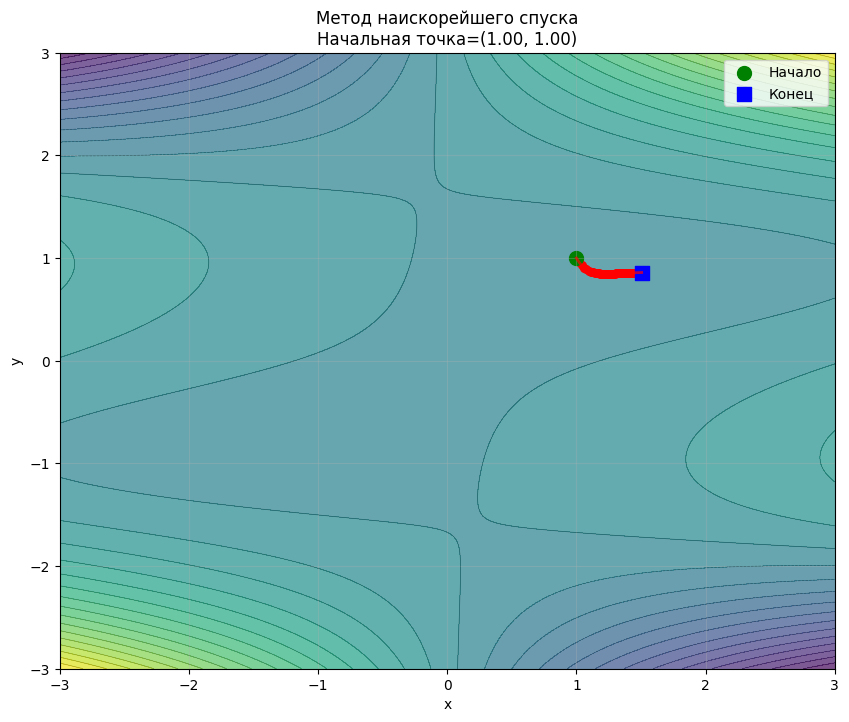


Начальная точка: (1.0000, 1.0000)
Конечная точка: (1.5047, 0.8591)
Начальное f: -3.000000
Конечное f: -3.844295
Итераций: 100


In [24]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ITER = 100
TOLERANCE = 1e-6

def f(x, y):
    return 2*x**2 + 4*x*y**3 - 10*x*y + y**2

def gradient(func, x, y, epsilon=1e-6):
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

def find_optimal_step(func, x, y, grad):
    """Находим оптимальный шаг вдоль направления антиградиента"""
    direction = -grad

    # Фиксируем максимальный шаг
    max_alpha = 0.01

    alphas = np.linspace(0, max_alpha, 20)
    best_alpha = 0.0
    best_f = func(x, y)

    for alpha in alphas:
        x_new = x + alpha * direction[0]
        y_new = y + alpha * direction[1]
        f_new = func(x_new, y_new)

        if f_new < best_f:
            best_f = f_new
            best_alpha = alpha

    return best_alpha

def gradient_descent_optimal(func, start_point, max_iter=MAX_ITER, tol=TOLERANCE):
    x, y = start_point
    history = [(x, y, func(x, y))]

    for i in range(max_iter):
        grad = gradient(func, x, y)
        grad_norm = np.linalg.norm(grad)

        if grad_norm < tol:
            print(f"Сходимость на итерации {i}")
            break

        alpha = find_optimal_step(func, x, y, grad)

        if alpha == 0.0:
            print(f"Не могу найти шаг на итерации {i}")
            break

        x = x - alpha * grad[0]
        y = y - alpha * grad[1]

        history.append((x, y, func(x, y)))
        print(f"Итерация {i}: ({x:.6f}, {y:.6f}), f={func(x, y):.6f}, шаг={alpha:.6f}")

    return history

def plot_gradient_on_contour(history, func):
    points = np.array([(p[0], p[1]) for p in history])
    x_path, y_path = points[:, 0], points[:, 1]

    # Фиксируем границы для этой функции
    x_min, x_max = -3, 3
    y_min, y_max = -3, 3

    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(10, 8))

    levels = np.linspace(Z.min(), Z.max(), 30)
    ax.contourf(X, Y, Z, levels=levels, alpha=0.7, cmap='viridis')
    ax.contour(X, Y, Z, levels=levels, colors='black', alpha=0.3, linewidths=0.5)

    ax.plot(x_path, y_path, 'r-', linewidth=2, alpha=0.7)
    ax.scatter(x_path, y_path, c='red', s=30)
    ax.scatter(x_path[0], y_path[0], c='green', s=100, marker='o', label='Начало')
    ax.scatter(x_path[-1], y_path[-1], c='blue', s=100, marker='s', label='Конец')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Метод наискорейшего спуска\nНачальная точка=({history[0][0]:.2f}, {history[0][1]:.2f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    plt.show()

    print(f"\nНачальная точка: ({history[0][0]:.4f}, {history[0][1]:.4f})")
    print(f"Конечная точка: ({history[-1][0]:.4f}, {history[-1][1]:.4f})")
    print(f"Начальное f: {history[0][2]:.6f}")
    print(f"Конечное f: {history[-1][2]:.6f}")
    print(f"Итераций: {len(history)-1}")

if __name__ == "__main__":

    start_point = (1, 1)
    print(f"Начальная точка: {start_point}")
    print("-" * 50)

    history = gradient_descent_optimal(f, start_point)

    if len(history) > 1:
        plot_gradient_on_contour(history, f)

## Шаг с неравенством Армихио

### Функция Химмельблау

Градиентный спуск с правилом Армихо
--------------------------------------------------
Начальная точка: (1, 3)
--------------------------------------------------
Итерация 0: (3.750000, 0.250000), f=21.132813, шаг=0.125000
Итерация 1: (3.073242, 0.196289), f=16.964912, шаг=0.015625
Итерация 2: (3.455762, 0.286456), f=13.496521, шаг=0.015625
Итерация 3: (3.298564, 0.310042), f=13.034575, шаг=0.015625
Итерация 4: (3.445321, 0.437857), f=13.020617, шаг=0.031250
Итерация 5: (3.268738, 0.489009), f=12.225140, шаг=0.015625
Итерация 6: (3.416041, 0.691616), f=11.497100, шаг=0.031250
Итерация 7: (3.029009, 0.875045), f=11.176475, шаг=0.031250
Итерация 8: (3.309033, 1.080032), f=7.433435, шаг=0.015625
Итерация 9: (2.772742, 1.632950), f=5.254765, шаг=0.062500
Итерация 10: (3.112471, 1.844705), f=0.518046, шаг=0.015625
Итерация 11: (2.935708, 1.923185), f=0.343860, шаг=0.031250
Итерация 12: (3.031249, 1.981462), f=0.030688, шаг=0.015625
Итерация 13: (3.000385, 1.981422), f=0.005679, шаг=0.015625


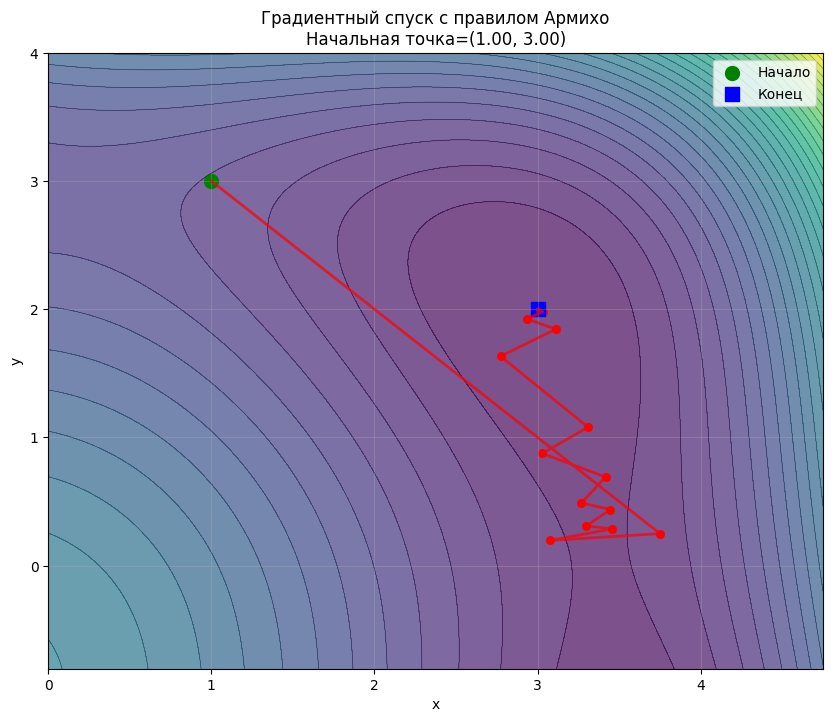


Начальная точка: (1.0000, 3.0000)
Конечная точка: (3.0000, 2.0000)
Начальное f: 58.000000
Конечное f: 0.000000
Итераций: 32


In [26]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ITER = 100
TOLERANCE = 1e-6

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradient(func, x, y, epsilon=1e-6):
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

def armijo_step_size(func, x, y, grad, alpha_init=1.0, c=1e-4, tau=0.5):
    alpha = alpha_init
    d = -grad
    grad_norm_sq = np.dot(grad, grad)

    f_current = func(x, y)

    for _ in range(20):
        x_new = x + alpha * d[0]
        y_new = y + alpha * d[1]
        f_new = func(x_new, y_new)

        if f_new <= f_current - c * alpha * grad_norm_sq:
            return alpha
        else:
            alpha = tau * alpha

    return alpha

def gradient_descent_armijo(func, start_point, max_iter=MAX_ITER, tol=TOLERANCE):
    x, y = start_point
    history = [(x, y, func(x, y))]

    for i in range(max_iter):
        grad = gradient(func, x, y)
        grad_norm = np.linalg.norm(grad)

        if grad_norm < tol:
            print(f"Сходимость на итерации {i}")
            break

        alpha = armijo_step_size(func, x, y, grad)

        x = x - alpha * grad[0]
        y = y - alpha * grad[1]

        history.append((x, y, func(x, y)))
        print(f"Итерация {i}: ({x:.6f}, {y:.6f}), f={func(x, y):.6f}, шаг={alpha:.6f}")

    return history

def plot_gradient_on_contour(history, func):
    points = np.array([(p[0], p[1]) for p in history])
    x_path, y_path = points[:, 0], points[:, 1]

    x_min, x_max = x_path.min(), x_path.max()
    y_min, y_max = y_path.min(), y_path.max()

    padding = max(1, max(x_max - x_min, y_max - y_min) * 0.3)
    x_min -= padding
    x_max += padding
    y_min -= padding
    y_max += padding

    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(10, 8))

    levels = np.linspace(Z.min(), Z.max(), 30)
    ax.contourf(X, Y, Z, levels=levels, alpha=0.7, cmap='viridis')
    ax.contour(X, Y, Z, levels=levels, colors='black', alpha=0.3, linewidths=0.5)

    ax.plot(x_path, y_path, 'r-', linewidth=2, alpha=0.7)
    ax.scatter(x_path, y_path, c='red', s=30)
    ax.scatter(x_path[0], y_path[0], c='green', s=100, marker='o', label='Начало')
    ax.scatter(x_path[-1], y_path[-1], c='blue', s=100, marker='s', label='Конец')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Градиентный спуск с правилом Армихо\nНачальная точка=({history[0][0]:.2f}, {history[0][1]:.2f})')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    plt.show()

    print(f"\nНачальная точка: ({history[0][0]:.4f}, {history[0][1]:.4f})")
    print(f"Конечная точка: ({history[-1][0]:.4f}, {history[-1][1]:.4f})")
    print(f"Начальное f: {history[0][2]:.6f}")
    print(f"Конечное f: {history[-1][2]:.6f}")
    print(f"Итераций: {len(history)-1}")

if __name__ == "__main__":

    start_point = (1, 3)
    print(f"Начальная точка: {start_point}")
    print("-" * 50)

    history = gradient_descent_armijo(f, start_point)

    if len(history) > 1:
        plot_gradient_on_contour(history, f)

### Функция $f(x,y) = 2x^2 + 4xy^3 - 10xy + y^2$

Итерация 0: (1.0200, 0.9600), f=-3.1799
Итерация 1: (1.0398, 0.9300), f=-3.2974
Итерация 2: (1.0590, 0.9075), f=-3.3782
Итерация 3: (1.0775, 0.8906), f=-3.4366
Итерация 4: (1.0952, 0.8780), f=-3.4811
Итерация 5: (1.1122, 0.8686), f=-3.5166
Итерация 6: (1.1283, 0.8618), f=-3.5462
Итерация 7: (1.1438, 0.8568), f=-3.5716
Итерация 8: (1.1585, 0.8533), f=-3.5940
Итерация 9: (1.1727, 0.8509), f=-3.6141
Итерация 10: (1.1862, 0.8492), f=-3.6323
Итерация 11: (1.1992, 0.8482), f=-3.6488
Итерация 12: (1.2116, 0.8476), f=-3.6640
Итерация 13: (1.2236, 0.8474), f=-3.6780
Итерация 14: (1.2350, 0.8474), f=-3.6909
Итерация 15: (1.2460, 0.8475), f=-3.7027
Итерация 16: (1.2566, 0.8478), f=-3.7137
Итерация 17: (1.2667, 0.8481), f=-3.7237
Итерация 18: (1.2765, 0.8485), f=-3.7331
Итерация 19: (1.2858, 0.8489), f=-3.7417
Итерация 20: (1.2948, 0.8493), f=-3.7496
Итерация 21: (1.3034, 0.8497), f=-3.7569
Итерация 22: (1.3117, 0.8501), f=-3.7637
Итерация 23: (1.3197, 0.8505), f=-3.7699
Итерация 24: (1.3274, 0.85

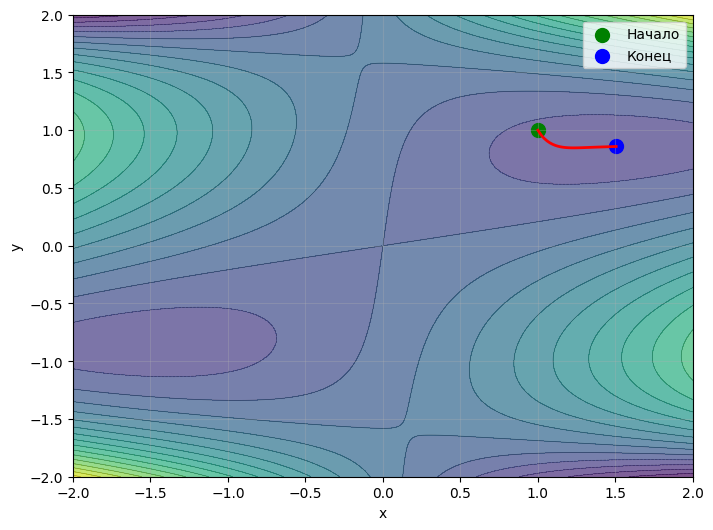


Начало: (1.0000, 1.0000)
Конец: (1.5047, 0.8591)
f(начало): -3.0000
f(конец): -3.8443


In [29]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ITER = 100
TOLERANCE = 1e-6

def f(x, y):
    return 2*x**2 + 4*x*y**3 - 10*x*y + y**2

def gradient(func, x, y, epsilon=1e-6):
    grad_x = (func(x + epsilon, y) - func(x - epsilon, y)) / (2 * epsilon)
    grad_y = (func(x, y + epsilon) - func(x, y - epsilon)) / (2 * epsilon)
    return np.array([grad_x, grad_y])

def armijo_step_size(func, x, y, grad, alpha_init=0.01, c=1e-4, tau=0.5):
    alpha = alpha_init
    f_current = func(x, y)
    grad_sq = np.dot(grad, grad)

    for _ in range(20):
        x_new = x - alpha * grad[0]
        y_new = y - alpha * grad[1]
        f_new = func(x_new, y_new)

        if f_new <= f_current - c * alpha * grad_sq:
            return alpha
        alpha = tau * alpha

    return alpha

def gradient_descent_armijo(func, start_point):
    x, y = start_point
    history = [(x, y, func(x, y))]

    for i in range(MAX_ITER):
        grad = gradient(func, x, y)

        if np.linalg.norm(grad) < TOLERANCE:
            break

        alpha = armijo_step_size(func, x, y, grad)
        x = x - alpha * grad[0]
        y = y - alpha * grad[1]

        history.append((x, y, func(x, y)))
        print(f"Итерация {i}: ({x:.4f}, {y:.4f}), f={func(x, y):.4f}")

    return history

def plot_gradient_on_contour(history, func):
    points = np.array([(p[0], p[1]) for p in history])
    x_path, y_path = points[:, 0], points[:, 1]

    x_min, x_max = -2, 2
    y_min, y_max = -2, 2

    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.contourf(X, Y, Z, levels=20, alpha=0.7, cmap='viridis')
    ax.contour(X, Y, Z, levels=20, colors='black', alpha=0.3, linewidths=0.5)

    ax.plot(x_path, y_path, 'r-', linewidth=2)
    ax.scatter(x_path[0], y_path[0], c='green', s=100, label='Начало')
    ax.scatter(x_path[-1], y_path[-1], c='blue', s=100, label='Конец')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.show()

    print(f"\nНачало: ({history[0][0]:.4f}, {history[0][1]:.4f})")
    print(f"Конец: ({history[-1][0]:.4f}, {history[-1][1]:.4f})")
    print(f"f(начало): {history[0][2]:.4f}")
    print(f"f(конец): {history[-1][2]:.4f}")

if __name__ == "__main__":
    start_point = (1, 1)
    history = gradient_descent_armijo(f, start_point)
    plot_gradient_on_contour(history, f)

## Метод сопряженных градиентов

### Функция Химмельблау

Начальная точка: (1, 3)
Шаг: 0.01
градиентный спуск (const):
Итерация 0: (1.000000, 3.000000), f=58.000000
Итерация 1: (1.220000, 2.780000), f=49.110701
Итерация 2: (1.509534, 2.697970), f=39.479591
Итерация 3: (1.837460, 2.625416), f=27.977084
Итерация 4: (2.170223, 2.543675), f=16.727191
Итерация 5: (2.462639, 2.451688), f=8.339813
Итерация 6: (2.677831, 2.356868), f=3.687270
Итерация 7: (2.810886, 2.270107), f=1.616746
Итерация 8: (2.884789, 2.199123), f=0.749059
Итерация 9: (2.925628, 2.145284), f=0.365919
Итерация 10: (2.949642, 2.105895), f=0.185317
Итерация 11: (2.964809, 2.077386), f=0.096154
Итерация 12: (2.974918, 2.056741), f=0.050739
Итерация 13: (2.981897, 2.041730), f=0.027098
Итерация 14: (2.986825, 2.030765), f=0.014599
Итерация 15: (2.990356, 2.022724), f=0.007915
Итерация 16: (2.992913, 2.016809), f=0.004311
Итерация 17: (2.994776, 2.012447), f=0.002356
Итерация 18: (2.996142, 2.009225), f=0.001291
Итерация 19: (2.997146, 2.006841), f=0.000709
Итерация 20: (2.997887, 

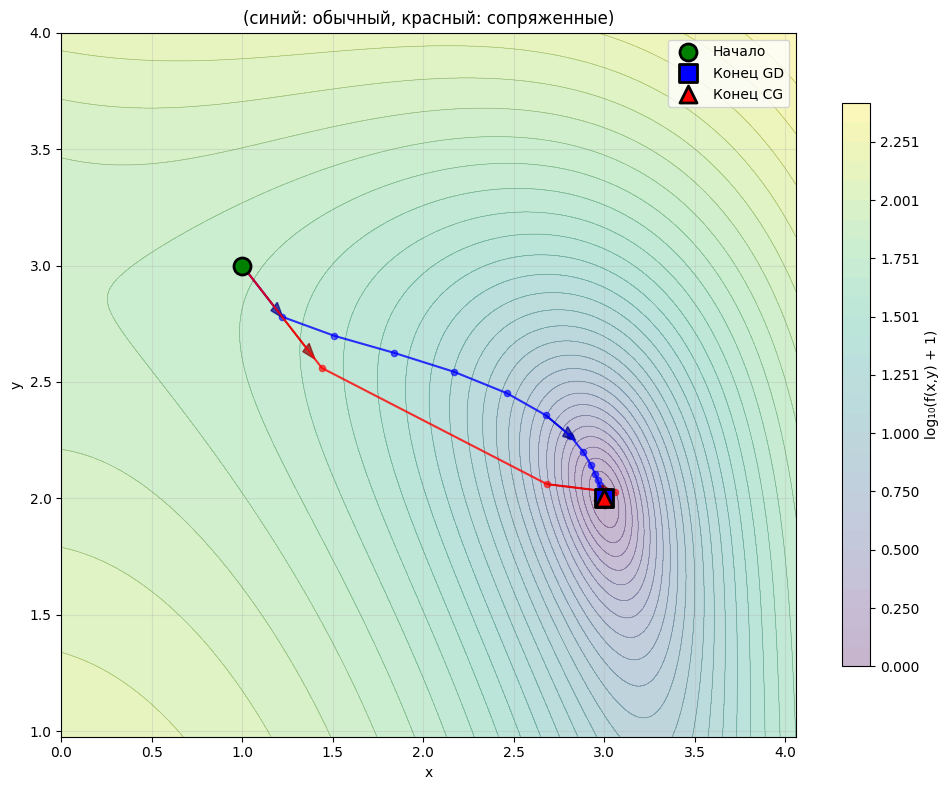

In [2]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ITER = 50
TOLERANCE = 1e-6
STEP_SIZE = 0.01

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradient(func, x, y):
    eps = 1e-6
    grad_x = (func(x + eps, y) - func(x - eps, y)) / (2 * eps)
    grad_y = (func(x, y + eps) - func(x, y - eps)) / (2 * eps)
    return np.array([grad_x, grad_y])

def gradient_descent(func, start_point):
    x, y = start_point
    history = [(x, y, func(x, y))]

    print("градиентный спуск (const):")
    print(f"Итерация 0: ({x:.6f}, {y:.6f}), f={func(x, y):.6f}")

    for i in range(1, MAX_ITER + 1):
        g = gradient(func, x, y)
        if np.linalg.norm(g) < TOLERANCE:
            break

        x = x - STEP_SIZE * g[0]
        y = y - STEP_SIZE * g[1]
        history.append((x, y, func(x, y)))

        print(f"Итерация {i}: ({x:.6f}, {y:.6f}), f={func(x, y):.6f}")

    return history

def conjugate_gradient(func, start_point):
    x, y = start_point
    history = [(x, y, func(x, y))]

    print("\nМетод сопряженных градиентов:")
    print(f"Итерация 0: ({x:.6f}, {y:.6f}), f={func(x, y):.6f}")

    g = gradient(func, x, y)
    d = -g
    g_old = g.copy()

    for i in range(1, MAX_ITER + 1):
        if np.linalg.norm(g) < TOLERANCE:
            break

        # Используем простой выбор шага как в исходном коде
        alpha = 0.01
        best_f = func(x + alpha * d[0], y + alpha * d[1])

        for test_alpha in [0.005, 0.01, 0.02]:
            f_test = func(x + test_alpha * d[0], y + test_alpha * d[1])
            if f_test < best_f:
                best_f = f_test
                alpha = test_alpha

        x = x + alpha * d[0]
        y = y + alpha * d[1]
        history.append((x, y, func(x, y)))

        print(f"Итерация {i}: ({x:.6f}, {y:.6f}), f={func(x, y):.6f}")

        g_new = gradient(func, x, y)

        # Правильная формула Флетчера-Ривза
        beta = np.dot(g_new, g_new) / np.dot(g, g) if np.dot(g, g) > 1e-10 else 0

        d = -g_new + beta * d
        g = g_new

        if i % 5 == 0:
            d = -g

    return history

def plot_comparison(gd_history, cg_history, func):
    gd_points = np.array([(p[0], p[1]) for p in gd_history])
    cg_points = np.array([(p[0], p[1]) for p in cg_history])

    all_x = np.concatenate([gd_points[:, 0], cg_points[:, 0]])
    all_y = np.concatenate([gd_points[:, 1], cg_points[:, 1]])

    x_min, x_max = all_x.min(), all_x.max()
    y_min, y_max = all_y.min(), all_y.max()

    padding = max(1, max(x_max - x_min, y_max - y_min) * 0.3)
    x_min -= padding
    x_max += padding
    y_min -= padding
    y_max += padding

    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    Z_log = np.log10(Z + 1)

    fig, ax = plt.subplots(figsize=(10, 8))

    levels = np.linspace(Z_log.min(), Z_log.max(), 30)
    contour = ax.contourf(X, Y, Z_log, levels=levels, alpha=0.3, cmap='viridis')
    ax.contour(X, Y, Z_log, levels=levels, colors='black', alpha=0.2, linewidths=0.5)

    ax.plot(gd_points[:, 0], gd_points[:, 1], 'b-', linewidth=1.5, alpha=0.8)
    ax.scatter(gd_points[:, 0], gd_points[:, 1], c='blue', s=20, alpha=0.6)

    ax.plot(cg_points[:, 0], cg_points[:, 1], 'r-', linewidth=1.5, alpha=0.8)
    ax.scatter(cg_points[:, 0], cg_points[:, 1], c='red', s=20, alpha=0.6)

    ax.scatter(gd_points[0, 0], gd_points[0, 1], c='green', s=150, marker='o',
               edgecolors='black', linewidth=2, label='Начало', zorder=10)
    ax.scatter(gd_points[-1, 0], gd_points[-1, 1], c='blue', s=150, marker='s',
               edgecolors='black', linewidth=2, label='Конец GD', zorder=10)
    ax.scatter(cg_points[-1, 0], cg_points[-1, 1], c='red', s=150, marker='^',
               edgecolors='black', linewidth=2, label='Конец CG', zorder=10)

    def add_arrows(points, color, ax):
        step = max(1, len(points) // 8)
        for i in range(0, len(points)-1, step):
            dx = points[i+1, 0] - points[i, 0]
            dy = points[i+1, 1] - points[i, 1]
            if np.sqrt(dx**2 + dy**2) > 0.01:
                ax.arrow(points[i, 0], points[i, 1], dx*0.8, dy*0.8,
                        head_width=0.05, head_length=0.07,
                        fc=color, ec=color, alpha=0.7)

    add_arrows(gd_points, 'darkblue', ax)
    add_arrows(cg_points, 'darkred', ax)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('(синий: обычный, красный: сопряженные)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    plt.colorbar(contour, ax=ax, shrink=0.8, label='log₁₀(f(x,y) + 1)')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    start_point = (1, 3)

    print(f"Начальная точка: ({start_point[0]}, {start_point[1]})")
    print(f"Шаг: {STEP_SIZE}")

    gd_history = gradient_descent(f, start_point)
    cg_history = conjugate_gradient(f, start_point)

    print(f"Обычный градиентный спуск:")
    print(f"  Начальная точка: ({gd_history[0][0]:.4f}, {gd_history[0][1]:.4f})")
    print(f"  Конечная точка: ({gd_history[-1][0]:.4f}, {gd_history[-1][1]:.4f})")
    print(f"  Начальное f: {gd_history[0][2]:.6f}")
    print(f"  Конечное f: {gd_history[-1][2]:.6f}")
    print(f"  Итераций: {len(gd_history)-1}")

    print(f"\nМетод сопряженных градиентов:")
    print(f"  Начальная точка: ({cg_history[0][0]:.4f}, {cg_history[0][1]:.4f})")
    print(f"  Конечная точка: ({cg_history[-1][0]:.4f}, {cg_history[-1][1]:.4f})")
    print(f"  Начальное f: {cg_history[0][2]:.6f}")
    print(f"  Конечное f: {cg_history[-1][2]:.6f}")
    print(f"  Итераций: {len(cg_history)-1}")

    plot_comparison(gd_history, cg_history, f)

### Функция $f(x,y) = 2x^2 + 4xy^3 - 10xy + y^2$

GD_adapt 1: x=1.096671, y=0.806658, f=-3.487786
GD_adapt 2: x=1.303629, y=0.910140, f=-3.706275
GD_adapt 3: x=1.338148, y=0.841103, f=-3.781452
GD_adapt 4: x=1.418686, y=0.881372, f=-3.816449
GD_adapt 5: x=1.433559, y=0.851628, f=-3.831326
GD_adapt 6: x=1.469328, y=0.869514, f=-3.838363
GD_adapt 7: x=1.476135, y=0.855899, f=-3.841566
GD_adapt 8: x=1.492726, y=0.864192, f=-3.843092
GD_adapt 9: x=1.495920, y=0.857802, f=-3.843806
GD_adapt 10: x=1.503751, y=0.861717, f=-3.844147
GD_adapt 11: x=1.505267, y=0.858684, f=-3.844309
GD_adapt 12: x=1.508994, y=0.860547, f=-3.844386
GD_adapt 13: x=1.509717, y=0.859101, f=-3.844423
GD_adapt 14: x=1.511497, y=0.859991, f=-3.844441
GD_adapt 15: x=1.511843, y=0.859299, f=-3.844450
GD_adapt 16: x=1.512695, y=0.859724, f=-3.844454
GD_adapt 17: x=1.512861, y=0.859393, f=-3.844456
GD_adapt 18: x=1.513269, y=0.859597, f=-3.844456
GD_adapt 19: x=1.513348, y=0.859438, f=-3.844457
GD_adapt 20: x=1.513544, y=0.859536, f=-3.844457
GD_adapt 21: x=1.513582, y=0.

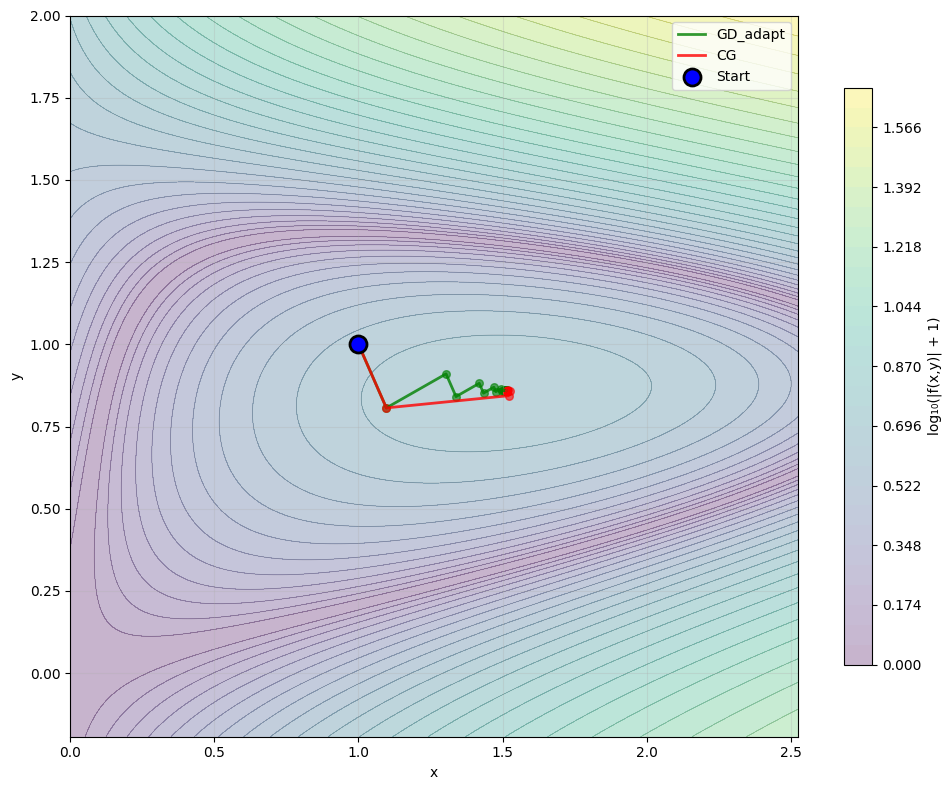

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

MAX_ITER = 50
TOLERANCE = 1e-6

def f(x, y):
    return 2*x**2 + 4*x*y**3 - 10*x*y + y**2

def analytical_gradient(x, y):
    df_dx = 4*x + 4*y**3 - 10*y
    df_dy = 12*x*y**2 - 10*x + 2*y
    return np.array([df_dx, df_dy])

def gradient_descent_adaptive(start_point, initial_step=0.01):
    x, y = start_point
    history = [(x, y, f(x, y))]

    for i in range(1, MAX_ITER + 1):
        g = analytical_gradient(x, y)
        if np.linalg.norm(g) < TOLERANCE:
            break

        def func_along_direction(alpha):
            return f(x - alpha * g[0], y - alpha * g[1])

        try:
            result = minimize_scalar(func_along_direction, bounds=(0, 1), method='bounded')
            alpha_opt = result.x
        except:
            alpha_opt = initial_step / (1 + i * 0.1)

        x = x - alpha_opt * g[0]
        y = y - alpha_opt * g[1]
        history.append((x, y, f(x, y)))
        print(f"GD_adapt {i}: x={x:.6f}, y={y:.6f}, f={f(x, y):.6f}")

    return history

def conjugate_gradient(start_point):
    x, y = start_point
    history = [(x, y, f(x, y))]

    g_old = analytical_gradient(x, y)
    d = -g_old

    for i in range(1, MAX_ITER + 1):
        if np.linalg.norm(g_old) < TOLERANCE:
            break

        def func_along_direction(alpha):
            return f(x + alpha * d[0], y + alpha * d[1])

        try:
            result = minimize_scalar(func_along_direction, bounds=(0, 1), method='bounded')
            alpha = result.x
        except:
            alpha = 0.01

        x = x + alpha * d[0]
        y = y + alpha * d[1]
        history.append((x, y, f(x, y)))
        print(f"CG {i}: x={x:.6f}, y={y:.6f}, f={f(x, y):.6f}")

        g_new = analytical_gradient(x, y)
        beta = np.dot(g_new, g_new) / np.dot(g_old, g_old) if np.dot(g_old, g_old) > 1e-10 else 0
        d = -g_new + beta * d
        g_old = g_new

    return history

def plot_results(histories, labels):
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['green', 'red']

    all_x = np.concatenate([np.array([p[0] for p in h]) for h in histories])
    all_y = np.concatenate([np.array([p[1] for p in h]) for h in histories])

    x_min, x_max = all_x.min(), all_x.max()
    y_min, y_max = all_y.min(), all_y.max()

    padding = max(1, max(x_max - x_min, y_max - y_min) * 0.3)
    x_min -= padding
    x_max += padding
    y_min -= padding
    y_max += padding

    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    Z_log = np.log10(np.abs(Z) + 1)

    levels = np.linspace(Z_log.min(), Z_log.max(), 30)
    contour = ax.contourf(X, Y, Z_log, levels=levels, alpha=0.3, cmap='viridis')
    ax.contour(X, Y, Z_log, levels=levels, colors='black', alpha=0.2, linewidths=0.5)

    for idx, history in enumerate(histories):
        points = np.array([(p[0], p[1]) for p in history])
        color = colors[idx % len(colors)]
        ax.plot(points[:, 0], points[:, 1], color=color, linewidth=2, alpha=0.8, label=labels[idx])
        ax.scatter(points[:, 0], points[:, 1], c=color, s=30, alpha=0.6)

    start_x, start_y = histories[0][0][0], histories[0][0][1]
    ax.scatter(start_x, start_y, c='blue', s=150, marker='o',
               edgecolors='black', linewidth=2, label='Start', zorder=10)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.colorbar(contour, ax=ax, shrink=0.8, label='log₁₀(|f(x,y)| + 1)')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    start_point = (1, 1)

    gd_adapt = gradient_descent_adaptive(start_point, initial_step=0.1)
    cg = conjugate_gradient(start_point)

    plot_results([gd_adapt, cg], ['GD_adapt', 'CG'])

# Функция Розенброка:
$$
    f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

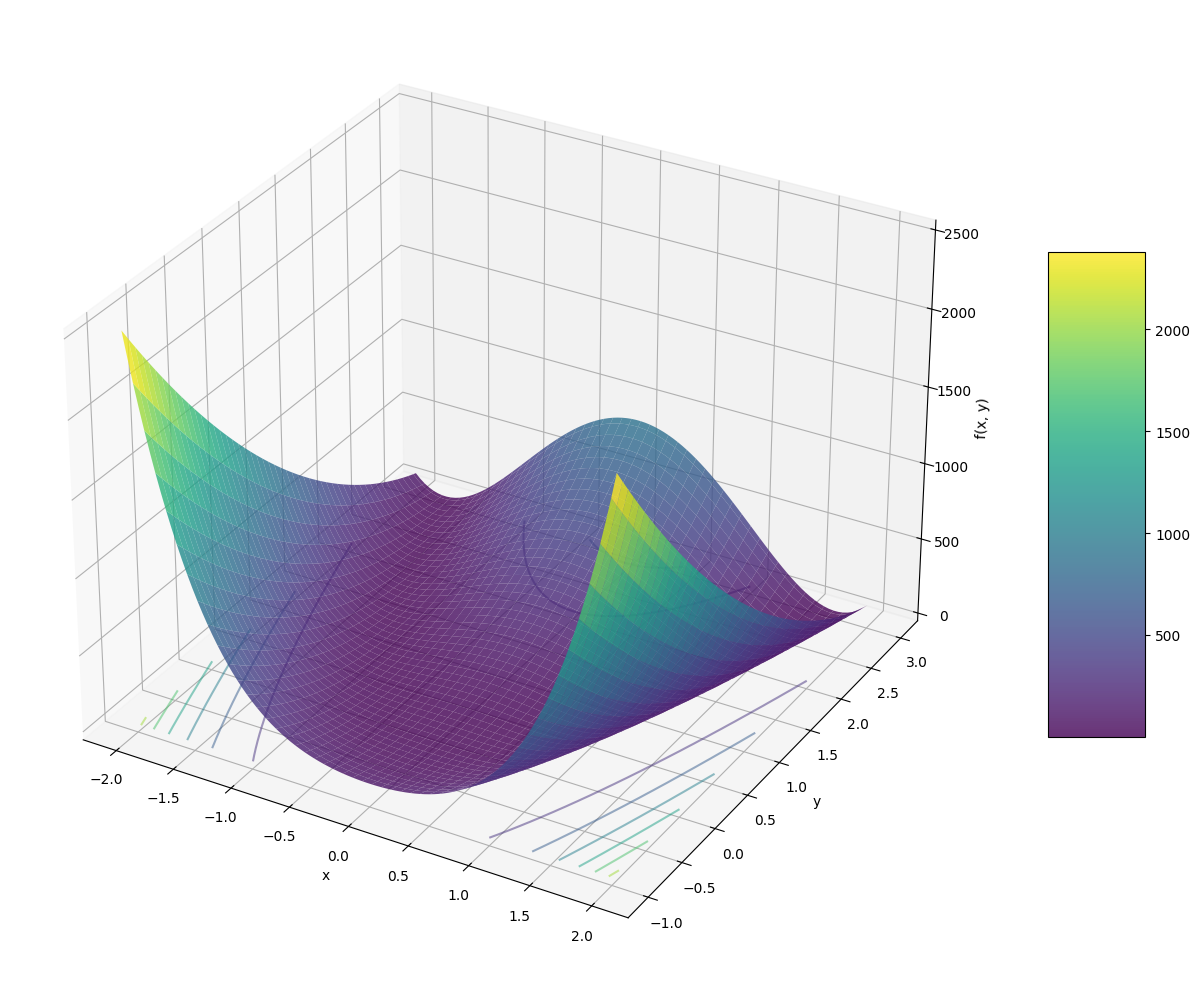

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0, antialiased=True)
ax.contour(X, Y, Z, zdir='z', offset=Z.min(), cmap='viridis', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

# Проверка сопряженных градиентов на функции Розенброка:

GD_const 1: x=-0.984400, y=1.088000, f=5.352912
GD_const 2: x=-1.027272, y=1.064209, f=4.117790
GD_const 3: x=-1.026883, y=1.062424, f=4.114552
GD_const 4: x=-1.026089, y=1.060837, f=4.111402
GD_const 5: x=-1.025311, y=1.059241, f=4.108251
GD_const 6: x=-1.024533, y=1.057646, f=4.105099
GD_const 7: x=-1.023753, y=1.056050, f=4.101944
GD_const 8: x=-1.022973, y=1.054454, f=4.098789
GD_const 9: x=-1.022193, y=1.052858, f=4.095632
GD_const 10: x=-1.021411, y=1.051262, f=4.092474
GD_const 11: x=-1.020629, y=1.049666, f=4.089314
GD_const 12: x=-1.019847, y=1.048070, f=4.086153
GD_const 13: x=-1.019063, y=1.046473, f=4.082990
GD_const 14: x=-1.018279, y=1.044877, f=4.079825
GD_const 15: x=-1.017495, y=1.043280, f=4.076660
GD_const 16: x=-1.016709, y=1.041683, f=4.073493
GD_const 17: x=-1.015923, y=1.040086, f=4.070324
GD_const 18: x=-1.015137, y=1.038489, f=4.067154
GD_const 19: x=-1.014349, y=1.036891, f=4.063982
GD_const 20: x=-1.013561, y=1.035294, f=4.060809
GD_const 21: x=-1.012773, y=1

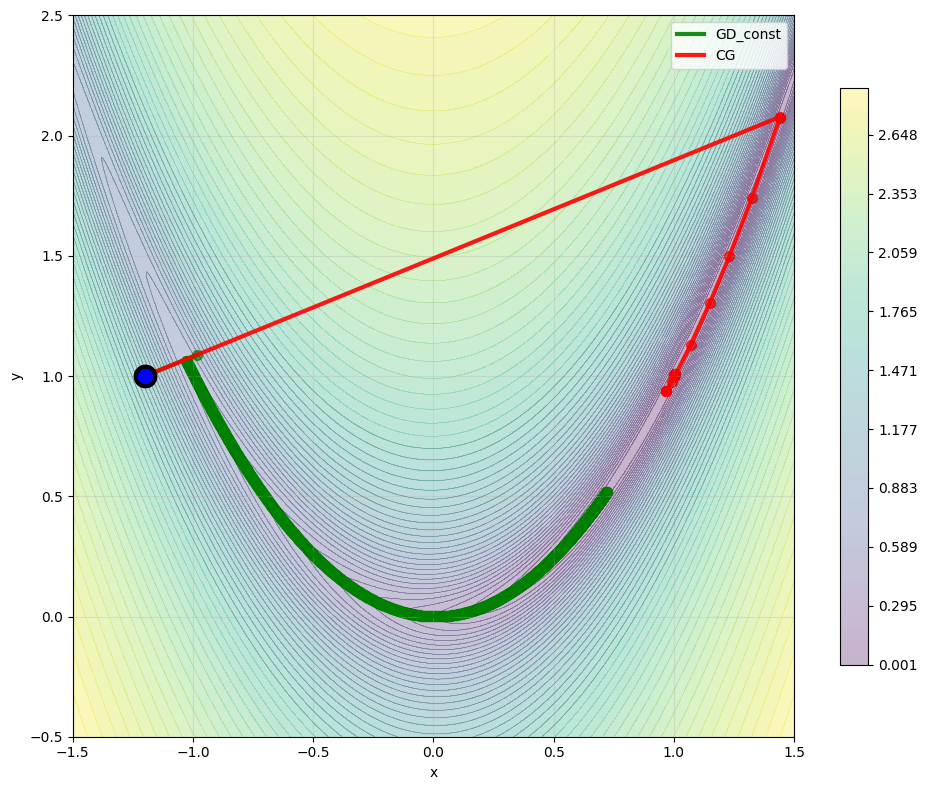

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

MAX_ITER = 2000
TOLERANCE = 1e-8

def f(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

def analytical_gradient(x, y):
    df_dx = -2*(1-x) - 400*x*(y-x**2)
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

def gradient_descent_constant(start_point, step_size=0.001):
    x, y = start_point
    history = [(x, y, f(x, y))]

    for i in range(1, MAX_ITER + 1):
        g = analytical_gradient(x, y)
        if np.linalg.norm(g) < TOLERANCE or f(x, y) < 1e-10:
            break

        x = x - step_size * g[0]
        y = y - step_size * g[1]
        history.append((x, y, f(x, y)))
        print(f"GD_const {i}: x={x:.6f}, y={y:.6f}, f={f(x, y):.6f}")

    return history

def conjugate_gradient(start_point):
    x, y = start_point
    history = [(x, y, f(x, y))]

    g_old = analytical_gradient(x, y)
    d = -g_old

    for i in range(1, MAX_ITER + 1):
        if np.linalg.norm(g_old) < TOLERANCE or f(x, y) < 1e-10:
            break

        def func_along_direction(alpha):
            return f(x + alpha * d[0], y + alpha * d[1])

        try:
            result = minimize_scalar(func_along_direction, bounds=(0, 0.1), method='bounded')
            alpha = result.x
        except:
            alpha = 0.001

        x = x + alpha * d[0]
        y = y + alpha * d[1]
        history.append((x, y, f(x, y)))
        print(f"CG {i}: x={x:.6f}, y={y:.6f}, f={f(x, y):.6f}")

        g_new = analytical_gradient(x, y)
        beta = np.dot(g_new, g_new) / np.dot(g_old, g_old) if np.dot(g_old, g_old) > 1e-10 else 0
        d = -g_new + beta * d
        g_old = g_new

    return history

def plot_results(histories, labels):
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['green', 'red']

    x_min, x_max = -1.5, 1.5
    y_min, y_max = -0.5, 2.5

    x_vals = np.linspace(x_min, x_max, 400)
    y_vals = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    Z_log = np.log10(Z + 1)

    levels = np.linspace(Z_log.min(), Z_log.max(), 50)
    contour = ax.contourf(X, Y, Z_log, levels=levels, alpha=0.3, cmap='viridis')
    ax.contour(X, Y, Z_log, levels=levels[:30], colors='black', alpha=0.2, linewidths=0.5)

    for idx, history in enumerate(histories):
        points = np.array([(p[0], p[1]) for p in history])
        color = colors[idx % len(colors)]

        ax.plot(points[:, 0], points[:, 1], color=color, linewidth=3, alpha=0.9, label=labels[idx])
        ax.scatter(points[:, 0], points[:, 1], c=color, s=50, alpha=0.7)

    start_x, start_y = histories[0][0][0], histories[0][0][1]
    ax.scatter(start_x, start_y, c='blue', s=200, marker='o',
               edgecolors='black', linewidth=3, zorder=10)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    plt.colorbar(contour, ax=ax, shrink=0.8)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    start_point = (-1.2, 1)

    gd_const = gradient_descent_constant(start_point, step_size=0.001)
    cg = conjugate_gradient(start_point)

    plot_results([gd_const, cg], ['GD_const', 'CG'])

# Проверка для квадратичной функции:

<div align="center">
  <img src="img/output.png" alt="wrong path" width="500">
</div>

$$
    f(x,y) = 5x^2 + 10xy + 50y^2
$$

$$
    \frac{1}{2} (A_{11}x^2 +(A_{12} + A_{21} xy)+A_{22}y^2) = 5x^2 + 10xy + 50y^2
$$

$$
    x^2: \frac{1}{2}A_{11} = 5 \rightarrow A_{11} = 10
$$
$$
    y^2: \frac{1}{2}A_{22} = 50 \rightarrow A_{22} = 100 \\
$$
$$
    xy: \frac{1}{2} 2 \cdot A_{12} = A_{12} = 10 \\
$$
$$
    \Rightarrow A = \begin{bmatrix} 10 & 10 \\ 10 & 100 \end{bmatrix}
$$

GD 1: x=1.960000, y=1.780000, f=212.516000
GD 2: x=1.922600, y=1.582400, f=174.104664
GD 3: x=1.887550, y=1.404934, f=143.025034
GD 4: x=1.854625, y=1.245565, f=117.870357
GD 5: x=1.823623, y=1.102462, f=97.503929
GD 6: x=1.794362, y=0.973980, f=81.007250
GD 7: x=1.766679, y=0.858638, f=67.638138
GD 8: x=1.740426, y=0.755108, f=56.796876
GD 9: x=1.715470, y=0.662193, f=47.998867
GD 10: x=1.691694, y=0.578819, f=40.852532
GD 11: x=1.668989, y=0.504020, f=35.041452
GD 12: x=1.647259, y=0.436928, f=30.309942
GD 13: x=1.626417, y=0.376763, f=26.451390
GD 14: x=1.606385, y=0.322822, f=23.298838
GD 15: x=1.587093, y=0.274476, f=20.717367
GD 16: x=1.568477, y=0.231158, f=18.597948
GD 17: x=1.550481, y=0.192357, f=16.852475
GD 18: x=1.533052, y=0.157617, f=15.409742
GD 19: x=1.516146, y=0.126524, f=14.212204
GD 20: x=1.499719, y=0.098710, f=13.213354
GD 21: x=1.483735, y=0.073842, f=12.375601
GD 22: x=1.468159, y=0.051621, f=11.668562
GD 23: x=1.452961, y=0.031777, f=11.067678
GD 24: x=1.43811

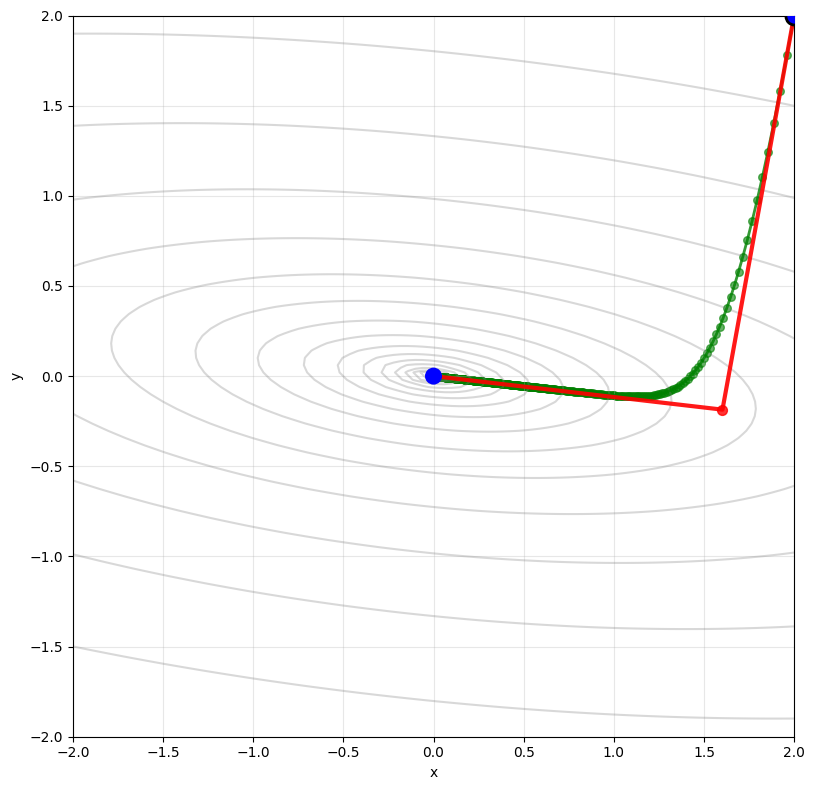

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return 5*x**2 + 10*x*y + 50*y**2 # H = [[10, 10],[10, 100]], d1 = 10, d2 = 900 => Строго выпуклая + 1 минимум

def grad(x, y):
    return np.array([10*x + 10*y, 10*x + 100*y])

def gradient_descent(start_point, step_size=0.001):
    x, y = start_point
    history = [(x, y, f(x, y))]

    for i in range(1, 1000):
        g = grad(x, y)

        x = x - step_size * g[0]
        y = y - step_size * g[1]
        history.append((x, y, f(x, y)))
        print(f"GD {i}: x={x:.6f}, y={y:.6f}, f={f(x, y):.6f}")

        if f(x, y) < 1e-10:
            break

    return history

def conjugate_gradient_quadratic(start_point):
    x, y = start_point
    history = [(x, y, f(x, y))]

    g_old = grad(x, y)
    d = -g_old

    for i in range(1, 3):
        H = np.array([[10, 10], [10, 100]])
        alpha = -np.dot(g_old, d) / np.dot(d, H @ d)

        x = x + alpha * d[0]
        y = y + alpha * d[1]
        history.append((x, y, f(x, y)))
        print(f"CG {i}: x={x:.6f}, y={y:.6f}, f={f(x, y):.6f}")

        g_new = grad(x, y)

        if f(x, y) < 1e-10:
            break

        beta = np.dot(g_new, g_new) / np.dot(g_old, g_old)
        d = -g_new + beta * d
        g_old = g_new

    return history

def plot_trajectories(gd_history, cg_history):
    fig, ax = plt.subplots(figsize=(10, 8))

    x_vals = np.linspace(-2, 2, 100)
    y_vals = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    levels = np.logspace(-2, 3, 20)
    ax.contour(X, Y, Z, levels=levels, colors='gray', alpha=0.3)

    gd_points = np.array([(p[0], p[1]) for p in gd_history])
    cg_points = np.array([(p[0], p[1]) for p in cg_history])

    ax.plot(gd_points[:, 0], gd_points[:, 1], 'g-', linewidth=2, alpha=0.8)
    ax.scatter(gd_points[:, 0], gd_points[:, 1], c='green', s=30, alpha=0.6)

    ax.plot(cg_points[:, 0], cg_points[:, 1], 'r-', linewidth=3, alpha=0.9)
    ax.scatter(cg_points[:, 0], cg_points[:, 1], c='red', s=50, alpha=0.8)

    ax.scatter(gd_points[0, 0], gd_points[0, 1], c='blue', s=150, marker='o',
               edgecolors='black', linewidth=2, zorder=10)

    ax.scatter(0, 0, c='blue', s=150, marker='o',
               edgecolors='none', linewidth=2, zorder=10)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    start_point = (2, 2)

    gd_history = gradient_descent(start_point, step_size=0.001)
    cg_history = conjugate_gradient_quadratic(start_point)

    plot_trajectories(gd_history, cg_history)